# DAT 205 Project - Transform data
## By Dennis Hung
## Version 1
## Code DRAFT 2021-03-21

## Updates
#### 


##  Reference

#### How to Get NBA Data Using the nba_api Python Module (Beginner). Retrieved from Plyaing Numbers: 

https://www.playingnumbers.com/2019/12/how-to-get-nba-data-using-the-nba_api-python-module-beginner/

#### Patel, S. (2020, August 19). swar / nba_api. Retrieved from GitHub: 

https://github.com/swar/nba_api/blob/master/docs/table_of_contents.md

#### Issues

https://github.com/swar/nba_api/issues/124



# Note: 
#### This code relies on the CSV output from "DAT 205-Group01-NBA-HistPlayGameLogs.ipynb" as the dataset for this transformation.

# Section 0: Function definitions

hms_string(sec_elapsed)


In [1]:
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60))/60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h,m,s)

# Null field analysis
def nullFieldAnalysis(df):
    df_missingDataInfo = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})
    #Printing the columns with over XX% of missing values (ie 60 = 60%) This is set to 0 for 0%
    null_threshold = 0 
    print("")
    print("")
    print("==== Null value analysis ====")
    return df_missingDataInfo[df_missingDataInfo['Percent'] > null_threshold].sort_values(by=['Percent'])


# Section 1: Import libraries

In [2]:
# Initialized required packages
# Standard packages
import numpy as np
import pandas as pd
import scipy as sp
import csv
import time

# Graphing packages
import seaborn as sns

# import matplotlib
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import matplotlib.lines as mlines

# Data preparation
from sklearn.preprocessing import LabelEncoder

# Modeling packages
# import tensorflow as tf
# import sklearn as skl
from sklearn.model_selection import train_test_split

# Regression modeling
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# from sklearn.model_selection import cross_val_score

# Confusion matrix, Accuracy, sensitivity and specificity
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

# from sklearn.feature_selection import VarianceThreshold 
from sklearn.feature_selection import RFE 
# from sklearn.feature_selection import RFECV

# Clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Following code is being deprecated
# from sklearn.datasets.samples_generator import make_blobs

# Initialize variables if there is any debugging required
# Insert following line and activate the debugging.
# # VALIDATION CODE 
# if debug_active == 'yes':
# 
# Use "display(df)"" if the result command is "df" to retain the same format



start_time = time.time()

# Section 2: Configuration of variables

Must manually set the following variables

gameTypeListed as one of the following: 'Pre Season', 'Regular Season', 'Playoffs'

seasonsListed for the game season in this format '2015-16'. Have at least 2 values

In [3]:
# pick who is running the code and comment out the others
# coder = 'bhavika'
# coder = 'cindy'
coder = 'dennis'


debug_active = 'yes'
loop_max = 100
# showNumRecs = 15
numFormat = '{:.4f}'

# Filter the dataset by team or None
allTeamsList = ['CLE', 'LAC', 'NOH', 'WAS', 'ORL', 'NJN', 'PHX', 'DET', 'IND', \
       'CHA', 'DAL', 'ATL', 'NYK', 'CHI', 'BOS', 'MIN', 'PHI', 'HOU', \
       'POR', 'TOR', 'SAC', 'UTA', 'GSW', 'MIA', 'SEA', 'MEM', 'LAL', \
       'SAS', 'DEN', 'MIL', 'NOK', 'ZAK', 'CHN', 'PAN', 'RMA', 'MMT', \
       'MTA', 'MAL', 'LRO', 'EPT', 'OKC', 'LRY', 'BAR', 'MOS', 'OLP', \
       'PAR', 'LAB', 'MAC', 'MLN', 'BKN', 'FCB', 'RMD', 'MPS', 'EAM', \
       'ALB', 'FBU', 'NOP', 'UBB', 'FLA', 'BAU', 'FEN', 'SLA', 'SDS', \
       'BNE', 'MEL', 'SYD', 'GUA', 'PER', 'ADL', 'NZB', 'BJD', 'FRA']
# teamSelected = 'None'
teamSelected = 'TOR'

# Process unit size
# processSize = 10000
processSize = 1000


# Train/Test configuration
# Select a season 
gameTypeListed = ['Pre Season', 'Regular Season', 'Playoffs']
gameTypeListed_code = [1, 2, 0]
gameTypeToProcess = 1
test_size_val = 0.30

# Model Analysis Configuration
random_state_val = 42

# Setup file name for csv or Excel (.xlsx)
if coder == 'bhavika':
    filename = 'D:/McMaster/DAT205/Capstone/Data/HistoricalGameLogs_2004-05_to_2019-20_ALL.csv'
elif coder == 'dennis':
    filename = './HistoricalGameLogs_2007-08_to_2008-09_ALL.csv'
    # filename = './HistoricalGameLogs_2004-05_to_2019-20_ALL.csv'
# filename = filename + seasonStart + '_to_' + seasonEnd + '_' + gameType + '.csv'
# filename = filename + seasonStart + '_to_' + seasonEnd + '_ALL' + '.csv'


# Update player stats per game each season



# Option 1: For all currently possible seasons
# seasonsListed = ['1946-47', '1947-48', '1948-49', '1949-50'
# , '1950-51', '1951-52', '1952-53', '1953-54', '1954-55', '1955-56', '1956-57', '1957-58', '1958-59', '1959-60'
# , '1960-61', '1961-62', '1962-63', '1963-64', '1964-65', '1965-66', '1966-67', '1967-68', '1968-69', '1969-70'
# , '1970-71', '1971-72', '1972-73', '1973-74', '1974-75', '1975-76', '1976-77', '1977-78', '1978-79', '1979-80'
# , '1980-81', '1981-82', '1982-83', '1983-84', '1984-85', '1985-86', '1986-87', '1987-88', '1988-89', '1989-90'
# , '1990-91', '1991-92', '1992-93', '1993-94', '1994-95', '1995-96', '1996-97', '1997-98', '1998-99', '1999-00'
# , '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10'
# , '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20'
# , '2020-21']

seasonsListed = ['2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10'
, '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']

seasonStart = seasonsListed[0]
seasonEnd = seasonsListed[-1]

# Request info for each season in the list
df_gamelogs_player = []
countFirstYear = 0

# Section 3: Upload the dataset and initial analysis

In [4]:
# load the CSV or Excel file 
# Note the other option in Jupyter Notebook is to use the upload the csv files before running the code

# lst of column names which needs to be string
lst_str_cols = ['GAME_ID']
# use dictionary comprehension to make dict of dtypes
dict_dtypes = {x : 'str'  for x in lst_str_cols}
# use dict on dtypes
df = pd.read_csv(filename, dtype=dict_dtypes)

# Excel file import
# df = pd.read_excel(filename)


# Remove duplicate index from import
unwanted_list = ['Unnamed: 0']

X_headers_list = df.columns.tolist()

for x in unwanted_list:
    X_headers_list.remove(x)

# Display current dataframe
df_Initial = df[X_headers_list]

# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Initial)
    # Examine shape of dataframe
    display(df_Initial.shape)
    # Examine the type of attributes in the dataframe
    print("Shape of the dataset")
    df_Initial.info()
    # Describe the numerical data
    df_Initial.describe()
    


SEASON_YEAR  PLAYER_ID       PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  \
0         2007-08     200759    Cedric Simmons  1610612739               CLE   
1         2007-08       1088     Chucky Atkins  1610612743               DEN   
2         2007-08     201191     JamesOn Curry  1610612741               CHI   
3         2007-08       1956        Ira Newble  1610612739               CLE   
4         2007-08       2743    Kris Humphries  1610612761               TOR   
...           ...        ...               ...         ...               ...   
58283     2008-09     200796         Leon Powe  1610612738               BOS   
58284     2008-09       1888  Richard Hamilton  1610612765               DET   
58285     2008-09        703       Kurt Thomas  1610612759               SAS   
58286     2008-09     101112     Channing Frye  1610612757               POR   
58287     2008-09       1630       Mikki Moore  1610612738               BOS   

                    TEAM_NAME     GAME_ID            GAME_DATE      MATCHUP  \
0         Cleveland Cavaliers  0010700104  2007-10-25T00:00:00    CLE @ TOR   
1              Denver Nuggets  0010700106  2007-10-25T00:00:00    DEN @ PHX   
2               Chicago Bulls  0010700109  2007-10-25T00:00:00  CHI vs. MIL   
3         Cleveland Cavaliers  0010700104  2007-10-25T00:00:00    CLE @ TOR   
4             Toronto Raptors  0010700104  2007-10-25T00:00:00  TOR vs. CLE   
...                       ...         ...                  ...          ...   
58283          Boston Celtics  0040800111  2009-04-18T00:00:00  BOS vs. CHI   
58284         Detroit Pistons  0040800101  2009-04-18T00:00:00    DET @ CLE   
58285       San Antonio Spurs  0040800161  2009-04-18T00:00:00  SAS vs. DAL   
58286  Portland Trail Blazers  0040800171  2009-04-18T00:00:00  POR vs. HOU   
58287          Boston Celtics  0040800111  2009-04-18T00:00:00  BOS vs. CHI   

      WL  ...  STL  BLK  BLKA  PF  PFD  PTS  PLUS_MINUS  DD2  TD3   Game_Type  
0      L  ...    0    0     0   2    0    0         -10    0    0  Pre Season  
1      L  ...    0    0     0   0    0    2           0    0    0  Pre Season  
2      W  ...    0    0     0   1    0    0           4    0    0  Pre Season  
3      L  ...    0    0     0   0    0    0          -2    0    0  Pre Season  
4      W  ...    1    0     0   4    2   11          23    0    0  Pre Season  
...   ..  ...  ...  ...   ...  ..  ...  ...         ...  ...  ...         ...  
58283  L  ...    0    0     0   2    6    8         -10    0    0    Playoffs  
58284  L  ...    0    0     0   1    2   15         -19    0    0    Playoffs  
58285  L  ...    1    0     0   1    0    0          -9    0    0    Playoffs  
58286  L  ...    0    0     0   4    1    4         -15    0    0    Playoffs  
58287  L  ...    0    0     0   0    0    2          -6    0    0    Playoffs  

[58288 rows x 35 columns]

(58288, 35)

Shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58288 entries, 0 to 58287
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEASON_YEAR        58288 non-null  object 
 1   PLAYER_ID          58288 non-null  int64  
 2   PLAYER_NAME        58093 non-null  object 
 3   TEAM_ID            58288 non-null  int64  
 4   TEAM_ABBREVIATION  58288 non-null  object 
 5   TEAM_NAME          58288 non-null  object 
 6   GAME_ID            58288 non-null  object 
 7   GAME_DATE          58288 non-null  object 
 8   MATCHUP            58288 non-null  object 
 9   WL                 58239 non-null  object 
 10  MIN                58288 non-null  float64
 11  FGM                58288 non-null  int64  
 12  FGA                58288 non-null  int64  
 13  FG_PCT             58288 non-null  float64
 14  FG3M               58288 non-null  int64  
 15  FG3A               58288 non-null  int64  
 16  F

## Initial Analysis

In [5]:
# Display the headers of columns that use descriptive or non-numerical values
categorical_Features = df_Initial.dtypes[df_Initial.dtypes == "object"].index.tolist()

# VALIDATION CODE 
if debug_active == 'yes':
    print("VALIDATION CODE")
    print(categorical_Features)

# Describe the categorical data
print("")
print("")
print("==== Description of the categorical features ====")
display(df_Initial[categorical_Features].describe())

# # Null field analysis
nullFieldAnalysis(df_Initial)
# # Null field analysis
# df_missingDataInfo = pd.DataFrame({'Count': df_Initial.isnull().sum(), 'Percent': 100*df_Initial.isnull().sum()/len(df)})

# #Printing the columns with over XX% of missing values (ie 60 = 60%) This is set to 0 for 0%
# null_threshold = 0 
# print("")
# print("")
# print("==== Null value analysis ====")
# df_missingDataInfo[df_missingDataInfo['Percent'] > null_threshold].sort_values(by=['Percent'])

VALIDATION CODE
['SEASON_YEAR', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'Game_Type']


==== Description of the categorical features ====


SEASON_YEAR  PLAYER_NAME TEAM_ABBREVIATION           TEAM_NAME  \
count        58288        58093             58288               58288   
unique           2          638                43                  43   
top        2007-08  Kobe Bryant               LAL  Los Angeles Lakers   
freq         29259          221              2330                2330   

           GAME_ID            GAME_DATE    MATCHUP     WL       Game_Type  
count        58288                58288      58288  58239           58288  
unique        2847                  457       1890      2               3  
top     0010700007  2009-01-02T00:00:00  UTA @ LAL      W  Regular Season  
freq            33                  304        137  29190           49515



==== Null value analysis ====


Count   Percent
WL              49  0.084065
PLAYER_NAME    195  0.334546

# 

# Section 4: Transforming/cleansing the data 

## Data cleansing of nulls (Not working)

## Correction to missing PreSeason games WL values only 

49 records 

2007-08 
GAME_ID 0010700072 / 2007-10-19
BOS vs NJN   W 36 to L 33

2008-09 
GAME_ID 0010800035 / 2008-10-11
DEN vs PHX   W 77 to L 72
Note some player game data seems missing

## Corrected missing player name data

740 records (727 preseason and 13 regular season)

This is not important as the player names are excluded from the analysis



In [6]:
# # df_missingDataInfo[df_missingDataInfo['Percent'] > null_threshold].loc[df_missingDataInfo[]]

# missingDataInfo_List = df_missingDataInfo.loc[df_missingDataInfo['Count']>0].index.tolist()
# # ['PLAYER_NAME', 'WL']

# numOfRows = len(df_missingDataInfo.index)

# for missingDataInfo_Value in missingDataInfo_List:
#     df_missingDataInfo[df_missingDataInfo[index] = missingDataInfo_Value]


# # Pull player data
# from nba_api.stats.static import players
# player_dict = players.get_players()


# # Use ternary operator or write function 
# # Names are case sensitive
# bron = [player for player in player_dict if player['full_name'] == 'LeBron James'][0]
# bron_id = bron['id']

# # find team Ids
# from nba_api.stats.static import teams 
# teams = teams.get_teams()
# GSW = [x for x in teams if x['full_name'] == 'Golden State Warriors'][0]
# GSW_id = GSW['id']

## Section 4a: Enhance the data

### NBA Advanced Stat: PIE

Name Player Impact Estimate 

Definition PIE measures a player's overall statistical contribution against the total statistics in games they play in. PIE yields results which are comparable to other advanced statistics (e.g. PER) using a simple formula.

Formula (PTS + FGM + FTM - FGA - FTA + DREB + (.5 * OREB) + AST + STL + (.5 * BLK) - PF - TO) / (GmPTS + GmFGM + GmFTM - GmFGA - GmFTA + GmDREB + (.5 * GmOREB) + GmAST + GmSTL + (.5 * GmBLK) - GmPF - GmTO)

In [7]:
df_TF = df_Initial
totalNumRec = df_TF.shape[0]
print(totalNumRec)
display(df_TF)
print(df_TF.columns)

58288


SEASON_YEAR  PLAYER_ID       PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  \
0         2007-08     200759    Cedric Simmons  1610612739               CLE   
1         2007-08       1088     Chucky Atkins  1610612743               DEN   
2         2007-08     201191     JamesOn Curry  1610612741               CHI   
3         2007-08       1956        Ira Newble  1610612739               CLE   
4         2007-08       2743    Kris Humphries  1610612761               TOR   
...           ...        ...               ...         ...               ...   
58283     2008-09     200796         Leon Powe  1610612738               BOS   
58284     2008-09       1888  Richard Hamilton  1610612765               DET   
58285     2008-09        703       Kurt Thomas  1610612759               SAS   
58286     2008-09     101112     Channing Frye  1610612757               POR   
58287     2008-09       1630       Mikki Moore  1610612738               BOS   

                    TEAM_NAME     GAME_ID            GAME_DATE      MATCHUP  \
0         Cleveland Cavaliers  0010700104  2007-10-25T00:00:00    CLE @ TOR   
1              Denver Nuggets  0010700106  2007-10-25T00:00:00    DEN @ PHX   
2               Chicago Bulls  0010700109  2007-10-25T00:00:00  CHI vs. MIL   
3         Cleveland Cavaliers  0010700104  2007-10-25T00:00:00    CLE @ TOR   
4             Toronto Raptors  0010700104  2007-10-25T00:00:00  TOR vs. CLE   
...                       ...         ...                  ...          ...   
58283          Boston Celtics  0040800111  2009-04-18T00:00:00  BOS vs. CHI   
58284         Detroit Pistons  0040800101  2009-04-18T00:00:00    DET @ CLE   
58285       San Antonio Spurs  0040800161  2009-04-18T00:00:00  SAS vs. DAL   
58286  Portland Trail Blazers  0040800171  2009-04-18T00:00:00  POR vs. HOU   
58287          Boston Celtics  0040800111  2009-04-18T00:00:00  BOS vs. CHI   

      WL  ...  STL  BLK  BLKA  PF  PFD  PTS  PLUS_MINUS  DD2  TD3   Game_Type  
0      L  ...    0    0     0   2    0    0         -10    0    0  Pre Season  
1      L  ...    0    0     0   0    0    2           0    0    0  Pre Season  
2      W  ...    0    0     0   1    0    0           4    0    0  Pre Season  
3      L  ...    0    0     0   0    0    0          -2    0    0  Pre Season  
4      W  ...    1    0     0   4    2   11          23    0    0  Pre Season  
...   ..  ...  ...  ...   ...  ..  ...  ...         ...  ...  ...         ...  
58283  L  ...    0    0     0   2    6    8         -10    0    0    Playoffs  
58284  L  ...    0    0     0   1    2   15         -19    0    0    Playoffs  
58285  L  ...    1    0     0   1    0    0          -9    0    0    Playoffs  
58286  L  ...    0    0     0   4    1    4         -15    0    0    Playoffs  
58287  L  ...    0    0     0   0    0    2          -6    0    0    Playoffs  

[58288 rows x 35 columns]

Index(['SEASON_YEAR', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK',
       'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'DD2', 'TD3', 'Game_Type'],
      dtype='object')


In [8]:
# Add columns for
#   UID_STG for SEASON_YEAR', 'TEAM_ID', 'GAME_ID'
#   PIE for Performance Impact Efficiency

addFieldInTFList = ['UID_STG', 'PIE']
for addField in addFieldInTFList:
    df_TF[addField] = 'new field'

In [9]:
display(df_TF)
# df_TF.to_csv('DAT205_Output_TF.csv') 

SEASON_YEAR  PLAYER_ID       PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  \
0         2007-08     200759    Cedric Simmons  1610612739               CLE   
1         2007-08       1088     Chucky Atkins  1610612743               DEN   
2         2007-08     201191     JamesOn Curry  1610612741               CHI   
3         2007-08       1956        Ira Newble  1610612739               CLE   
4         2007-08       2743    Kris Humphries  1610612761               TOR   
...           ...        ...               ...         ...               ...   
58283     2008-09     200796         Leon Powe  1610612738               BOS   
58284     2008-09       1888  Richard Hamilton  1610612765               DET   
58285     2008-09        703       Kurt Thomas  1610612759               SAS   
58286     2008-09     101112     Channing Frye  1610612757               POR   
58287     2008-09       1630       Mikki Moore  1610612738               BOS   

                    TEAM_NAME     GAME_ID            GAME_DATE      MATCHUP  \
0         Cleveland Cavaliers  0010700104  2007-10-25T00:00:00    CLE @ TOR   
1              Denver Nuggets  0010700106  2007-10-25T00:00:00    DEN @ PHX   
2               Chicago Bulls  0010700109  2007-10-25T00:00:00  CHI vs. MIL   
3         Cleveland Cavaliers  0010700104  2007-10-25T00:00:00    CLE @ TOR   
4             Toronto Raptors  0010700104  2007-10-25T00:00:00  TOR vs. CLE   
...                       ...         ...                  ...          ...   
58283          Boston Celtics  0040800111  2009-04-18T00:00:00  BOS vs. CHI   
58284         Detroit Pistons  0040800101  2009-04-18T00:00:00    DET @ CLE   
58285       San Antonio Spurs  0040800161  2009-04-18T00:00:00  SAS vs. DAL   
58286  Portland Trail Blazers  0040800171  2009-04-18T00:00:00  POR vs. HOU   
58287          Boston Celtics  0040800111  2009-04-18T00:00:00  BOS vs. CHI   

      WL  ...  BLKA  PF  PFD  PTS  PLUS_MINUS  DD2  TD3   Game_Type  \
0      L  ...     0   2    0    0         -10    0    0  Pre Season   
1      L  ...     0   0    0    2           0    0    0  Pre Season   
2      W  ...     0   1    0    0           4    0    0  Pre Season   
3      L  ...     0   0    0    0          -2    0    0  Pre Season   
4      W  ...     0   4    2   11          23    0    0  Pre Season   
...   ..  ...   ...  ..  ...  ...         ...  ...  ...         ...   
58283  L  ...     0   2    6    8         -10    0    0    Playoffs   
58284  L  ...     0   1    2   15         -19    0    0    Playoffs   
58285  L  ...     0   1    0    0          -9    0    0    Playoffs   
58286  L  ...     0   4    1    4         -15    0    0    Playoffs   
58287  L  ...     0   0    0    2          -6    0    0    Playoffs   

         UID_STG        PIE  
0      new field  new field  
1      new field  new field  
2      new field  new field  
3      new field  new field  
4      new field  new field  
...          ...        ...  
58283  new field  new field  
58284  new field  new field  
58285  new field  new field  
58286  new field  new field  
58287  new field  new field  

[58288 rows x 37 columns]

In [10]:
# Reference to sum column values under certain condition.
# https://intellipaat.com/community/49/how-do-i-sum-values-in-a-column-that-match-a-given-condition-using-pandas
# https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/  
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html


# for currNumRec in (0,totalNumRec,1):
# currNumRec = 4
# pick by cell in dataframe

# Update UID_STG with calculated values  'SEASON_YEAR', 'TEAM_ID', 'GAME_ID'
# totalNumRec = 58288

# df_TF['UID_STG'] = df_TF['UID_STG'].apply(lambda df_TF['UID_STG']: df_TF['SEASON_YEAR'] + str(df_TF['TEAM_ID'] +  df_TF['GAME_ID'])
# df_TF['UID_STG'] = df_TF['UID_STG'].apply(lambda df_TF['UID_STG']: df_TF['SEASON_YEAR'])
# df_TF['PIE'] = df_TF['PIE'].map(lambda df_TF['PIE']: df_TF['SEASON_YEAR'])


for currNumRec in range(totalNumRec):
    df_TF['UID_STG'].loc[currNumRec] = df_TF['SEASON_YEAR'].loc[currNumRec] + str(df_TF['TEAM_ID'].loc[currNumRec]) +  df_TF['GAME_ID'].loc[currNumRec]
    wholeNum = currNumRec/processSize
    if wholeNum.is_integer():
        print(wholeNum)


display(df_TF['PF'].loc[currNumRec])

# gmPTS = df_TF.loc[df_TF[]

# PIE = (df_TF['PTS'].loc[currNumRec] + df_TF['FGM'].loc[currNumRec] + df_TF['FTM'].loc[currNumRec] \
#     - df_TF['FGA'].loc[currNumRec] - df_TF['FTA'].loc[currNumRec] \
#     + df_TF['DREB'].loc[currNumRec] + (0.5 * df_TF['OREB'].loc[currNumRec]) \
#     + df_TF['AST'].loc[currNumRec] + df_TF['STL'].loc[currNumRec] + (0.5 * df_TF['BLK'].loc[currNumRec]) \
#     - df_TF['PF'].loc[currNumRec] - df_TF['TOV'].loc[currNumRec])


display(df_TF)
print(df_TF['PLAYER_NAME'].loc[currNumRec])
# print(PIE)
    # PTS + FGM + FTM - FGA - FTA + DREB + (.5 * OREB) + AST + STL + (.5 * BLK) - PF - TO) / (GmPTS + GmFGM + GmFTM - GmFGA - GmFTA + GmDREB + (.5 * GmOREB) + GmAST + GmSTL + (.5 * GmBLK) - GmPF - GmTO)

0.0
C:\Users\Dennis\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0


0

SEASON_YEAR  PLAYER_ID       PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  \
0         2007-08     200759    Cedric Simmons  1610612739               CLE   
1         2007-08       1088     Chucky Atkins  1610612743               DEN   
2         2007-08     201191     JamesOn Curry  1610612741               CHI   
3         2007-08       1956        Ira Newble  1610612739               CLE   
4         2007-08       2743    Kris Humphries  1610612761               TOR   
...           ...        ...               ...         ...               ...   
58283     2008-09     200796         Leon Powe  1610612738               BOS   
58284     2008-09       1888  Richard Hamilton  1610612765               DET   
58285     2008-09        703       Kurt Thomas  1610612759               SAS   
58286     2008-09     101112     Channing Frye  1610612757               POR   
58287     2008-09       1630       Mikki Moore  1610612738               BOS   

                    TEAM_NAME     GAME_ID            GAME_DATE      MATCHUP  \
0         Cleveland Cavaliers  0010700104  2007-10-25T00:00:00    CLE @ TOR   
1              Denver Nuggets  0010700106  2007-10-25T00:00:00    DEN @ PHX   
2               Chicago Bulls  0010700109  2007-10-25T00:00:00  CHI vs. MIL   
3         Cleveland Cavaliers  0010700104  2007-10-25T00:00:00    CLE @ TOR   
4             Toronto Raptors  0010700104  2007-10-25T00:00:00  TOR vs. CLE   
...                       ...         ...                  ...          ...   
58283          Boston Celtics  0040800111  2009-04-18T00:00:00  BOS vs. CHI   
58284         Detroit Pistons  0040800101  2009-04-18T00:00:00    DET @ CLE   
58285       San Antonio Spurs  0040800161  2009-04-18T00:00:00  SAS vs. DAL   
58286  Portland Trail Blazers  0040800171  2009-04-18T00:00:00  POR vs. HOU   
58287          Boston Celtics  0040800111  2009-04-18T00:00:00  BOS vs. CHI   

      WL  ...  BLKA  PF  PFD  PTS  PLUS_MINUS  DD2  TD3   Game_Type  \
0      L  ...     0   2    0    0         -10    0    0  Pre Season   
1      L  ...     0   0    0    2           0    0    0  Pre Season   
2      W  ...     0   1    0    0           4    0    0  Pre Season   
3      L  ...     0   0    0    0          -2    0    0  Pre Season   
4      W  ...     0   4    2   11          23    0    0  Pre Season   
...   ..  ...   ...  ..  ...  ...         ...  ...  ...         ...   
58283  L  ...     0   2    6    8         -10    0    0    Playoffs   
58284  L  ...     0   1    2   15         -19    0    0    Playoffs   
58285  L  ...     0   1    0    0          -9    0    0    Playoffs   
58286  L  ...     0   4    1    4         -15    0    0    Playoffs   
58287  L  ...     0   0    0    2          -6    0    0    Playoffs   

                           UID_STG        PIE  
0      2007-0816106127390010700104  new field  
1      2007-0816106127430010700106  new field  
2      2007-0816106127410010700109  new field  
3      2007-0816106127390010700104  new field  
4      2007-0816106127610010700104  new field  
...                            ...        ...  
58283  2008-0916106127380040800111  new field  
58284  2008-0916106127650040800101  new field  
58285  2008-0916106127590040800161  new field  
58286  2008-0916106127570040800171  new field  
58287  2008-0916106127380040800111  new field  

[58288 rows x 37 columns]

Mikki Moore


In [11]:
# print(totalNumRec)
# print(range(totalNumRec))


In [12]:
# Create dataframe of team game stats
TeamGameStats_List = ['SEASON_YEAR','TEAM_ABBREVIATION', 'Game_Type', 'GmFGM', 'GmFGA', 'GmFG_PCT', 'GmFG3M', 'GmFG3A', 'GmFG3_PCT', 'GmFTM', 'GmFTA', 'GmFT_PCT', 'GmOREB', 'GmDREB', 'GmREB', 'GmAST', 'GmTOV', 'GmSTL', 'GmBLK', 'GmBLKA', 'GmPF', 'GmPFD', 'GmPTS', 'GmPLUS_MINUS', 'GmDD2', 'GmTD3']

# df_TeamGameStats = pd.DataFrame(data, index=index, columns=columns)
df_TeamGameStats = pd.DataFrame(df_TF['UID_STG'].unique(), columns = ['UID_STG'])

for TeamGameStat in TeamGameStats_List:
    df_TeamGameStats[TeamGameStat] = ''


In [13]:
# Populate the dataframe with TeamGameStats for currNumRec in range(totalNumRec):
totalNumRec2 = df_TeamGameStats.shape[0]
TeamGameStat_List = df_TeamGameStats['UID_STG'].tolist()

# for currTeamGameStat in TeamGameStat_List:  
for currNumRec2 in range(totalNumRec2):    
    # Pull UID_STG from df_TeamGameStats 
    currTeamGameUID = df_TeamGameStats['UID_STG'].loc[currNumRec2]
    # Filter df_TF by UID_STG and create temp dataframe for this data
    df_TF_Temp = []
    df_TF_Temp = df_TF[df_TF['UID_STG']==currTeamGameUID]
    # Input in to df_TeamGameStats row with the following calculations for 
    # 'SEASON_YEAR','TEAM_ABBREVIATION', 'Game_Type', 'GmFGM', 'GmFGA', 'GmFG_PCT', 'GmFG3M', 'GmFG3A', 'GmFG3_PCT', 
    # 'GmFTM', 'GmFTA', 'GmFT_PCT', 'GmOREB', 'GmDREB', 'GmREB', 'GmAST', 'GmTOV', 'GmSTL', 'GmBLK',
    # 'GmBLKA', 'GmPF', 'GmPFD', 'GmPTS', 'GmPLUS_MINUS', 'GmDD2', 'GmTD3'
    df_TeamGameStats['SEASON_YEAR'].loc[currNumRec2] = df_TF_Temp['SEASON_YEAR'].unique()[0]
    df_TeamGameStats['TEAM_ABBREVIATION'].loc[currNumRec2] = df_TF_Temp['TEAM_ABBREVIATION'].unique()[0]
    df_TeamGameStats['Game_Type'].loc[currNumRec2] = df_TF_Temp['Game_Type'].unique()[0]
    df_TeamGameStats['GmFGM'].loc[currNumRec2] = df_TF_Temp['FGM'].sum()
    df_TeamGameStats['GmFGA'].loc[currNumRec2] = df_TF_Temp['FGA'].sum()
    df_TeamGameStats['GmFG_PCT'].loc[currNumRec2] = df_TF_Temp['FGM'].sum() / df_TF_Temp['FGA'].sum()
    df_TeamGameStats['GmFG3M'].loc[currNumRec2] = df_TF_Temp['FG3M'].sum()
    df_TeamGameStats['GmFG3A'].loc[currNumRec2] = df_TF_Temp['FG3A'].sum()
    df_TeamGameStats['GmFG3_PCT'].loc[currNumRec2] = df_TF_Temp['FG3M'].sum() / df_TF_Temp['FG3A'].sum()
    df_TeamGameStats['GmFTM'].loc[currNumRec2] = df_TF_Temp['FTM'].sum()
    df_TeamGameStats['GmFTA'].loc[currNumRec2] = df_TF_Temp['FTA'].sum()
    df_TeamGameStats['GmFT_PCT'].loc[currNumRec2] = df_TF_Temp['FTM'].sum() / df_TF_Temp['FTA'].sum()
    df_TeamGameStats['GmOREB'].loc[currNumRec2] = df_TF_Temp['OREB'].sum()
    df_TeamGameStats['GmDREB'].loc[currNumRec2] = df_TF_Temp['DREB'].sum()
    df_TeamGameStats['GmREB'].loc[currNumRec2] = df_TF_Temp['OREB'].sum() + df_TF_Temp['DREB'].sum()
    df_TeamGameStats['GmAST'].loc[currNumRec2] = df_TF_Temp['AST'].sum()
    df_TeamGameStats['GmTOV'].loc[currNumRec2] = df_TF_Temp['TOV'].sum()
    df_TeamGameStats['GmSTL'].loc[currNumRec2] = df_TF_Temp['STL'].sum()
    df_TeamGameStats['GmBLK'].loc[currNumRec2] = df_TF_Temp['BLK'].sum()
    df_TeamGameStats['GmBLKA'].loc[currNumRec2] = df_TF_Temp['BLKA'].sum()
    df_TeamGameStats['GmPF'].loc[currNumRec2] = df_TF_Temp['PF'].sum()
    df_TeamGameStats['GmPFD'].loc[currNumRec2] = df_TF_Temp['PFD'].sum()
    df_TeamGameStats['GmPTS'].loc[currNumRec2] = df_TF_Temp['PTS'].sum()
    df_TeamGameStats['GmPLUS_MINUS'].loc[currNumRec2] = df_TF_Temp['PLUS_MINUS'].sum() / 5
    df_TeamGameStats['GmDD2'].loc[currNumRec2] = df_TF_Temp['DD2'].sum()
    df_TeamGameStats['GmTD3'].loc[currNumRec2] = df_TF_Temp['TD3'].sum()
    # Counter to show this is still processing
    wholeNum = currNumRec2/processSize
    if wholeNum.is_integer():
        print(wholeNum)

# Check df_TeamGameStats
# VALIDATION CODE 
if debug_active == 'yes':
    display(df_TeamGameStats)

0.0
1.0
2.0
3.0
4.0
5.0


UID_STG SEASON_YEAR TEAM_ABBREVIATION   Game_Type  \
0     2007-0816106127390010700104     2007-08               CLE  Pre Season   
1     2007-0816106127430010700106     2007-08               DEN  Pre Season   
2     2007-0816106127410010700109     2007-08               CHI  Pre Season   
3     2007-0816106127610010700104     2007-08               TOR  Pre Season   
4     2007-0816106127560010700106     2007-08               PHX  Pre Season   
...                           ...         ...               ...         ...   
5689  2008-0916106127570040800171     2008-09               POR    Playoffs   
5690  2008-0916106127450040800171     2008-09               HOU    Playoffs   
5691  2008-0916106127590040800161     2008-09               SAS    Playoffs   
5692  2008-0916106127380040800111     2008-09               BOS    Playoffs   
5693  2008-0916106127390040800101     2008-09               CLE    Playoffs   

     GmFGM GmFGA  GmFG_PCT GmFG3M GmFG3A  GmFG3_PCT  ... GmTOV GmSTL GmBLK  \
0       28    68  0.411765      3     16     0.1875  ...    20     6     4   
1       38    85  0.447059      3     18   0.166667  ...    15     9     3   
2       38    77  0.493506      8     19   0.421053  ...    15    10     8   
3       40    85  0.470588      9     18        0.5  ...     8    14     3   
4       42    88  0.477273      9     25       0.36  ...    19     6     4   
...    ...   ...       ...    ...    ...        ...  ...   ...   ...   ...   
5689    35    84  0.416667      1     11  0.0909091  ...     8     4     3   
5690    38    65  0.584615      8     21   0.380952  ...    12     5     6   
5691    38    81  0.469136     11     14   0.785714  ...     9     2     0   
5692    39    99  0.393939      4     16       0.25  ...    12     8     7   
5693    37    70  0.528571      5     15   0.333333  ...     4     4     5   

     GmBLKA GmPF GmPFD GmPTS GmPLUS_MINUS GmDD2 GmTD3  
0         3   24    28    78          -33     0     0  
1         4   25    35   113           -3     0     0  
2         3   25    22    97           16     0     0  
3         4   28    24   111           33     0     0  
4         3   35    25   116            3     1     0  
...     ...  ...   ...   ...          ...   ...   ...  
5689      6   23    21    81          -27     0     0  
5690      3   21    23   108           27     0     0  
5691      3   20    17    97           -8     0     0  
5692     10   20    26   103           -2     0     0  
5693      3   10    18   102           18     1     0  

[5694 rows x 27 columns]

In [14]:
# If a specific team is selected by 'TEAM_ABBREVIATION' then recreate the dataframe with this filter else use the entire dataset as is.
if teamSelected in allTeamsList:
    df_TF = df_TF[df_TF['TEAM_ABBREVIATION']==teamSelected]
else:
    df_TF    
display(df_TF)

SEASON_YEAR  PLAYER_ID       PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  \
4         2007-08       2743    Kris Humphries  1610612761               TOR   
10        2007-08        239    Darrick Martin  1610612761               TOR   
11        2007-08     101121       Joey Graham  1610612761               TOR   
13        2007-08       2413        Juan Dixon  1610612761               TOR   
14        2007-08       1725  Rasho Nesterovic  1610612761               TOR   
...           ...        ...               ...         ...               ...   
56376     2008-09        979   Jermaine O'Neal  1610612761               TOR   
56380     2008-09     101181     Jose Calderon  1610612761               TOR   
56423     2008-09     101121       Joey Graham  1610612761               TOR   
56433     2008-09       1515    Anthony Parker  1610612761               TOR   
56462     2008-09       2574      Jason Kapono  1610612761               TOR   

             TEAM_NAME     GAME_ID            GAME_DATE      MATCHUP WL  ...  \
4      Toronto Raptors  0010700104  2007-10-25T00:00:00  TOR vs. CLE  W  ...   
10     Toronto Raptors  0010700104  2007-10-25T00:00:00  TOR vs. CLE  W  ...   
11     Toronto Raptors  0010700104  2007-10-25T00:00:00  TOR vs. CLE  W  ...   
13     Toronto Raptors  0010700104  2007-10-25T00:00:00  TOR vs. CLE  W  ...   
14     Toronto Raptors  0010700104  2007-10-25T00:00:00  TOR vs. CLE  W  ...   
...                ...         ...                  ...          ... ..  ...   
56376  Toronto Raptors  0020800005  2008-10-29T00:00:00    TOR @ PHI  W  ...   
56380  Toronto Raptors  0020800005  2008-10-29T00:00:00    TOR @ PHI  W  ...   
56423  Toronto Raptors  0020800005  2008-10-29T00:00:00    TOR @ PHI  W  ...   
56433  Toronto Raptors  0020800005  2008-10-29T00:00:00    TOR @ PHI  W  ...   
56462  Toronto Raptors  0020800005  2008-10-29T00:00:00    TOR @ PHI  W  ...   

       BLKA  PF  PFD  PTS  PLUS_MINUS  DD2  TD3       Game_Type  \
4         0   4    2   11          23    0    0      Pre Season   
10        0   1    0    5          10    0    0      Pre Season   
11        0   0    2    5          11    0    0      Pre Season   
13        0   0    1    5          19    0    0      Pre Season   
14        1   1    0    2           2    0    0      Pre Season   
...     ...  ..  ...  ...         ...  ...  ...             ...   
56376     0   5    4   17           0    0    0  Regular Season   
56380     2   5    1   13           4    0    0  Regular Season   
56423     2   2    0    4           2    0    0  Regular Season   
56433     1   2    0    9          11    0    0  Regular Season   
56462     0   1    1   15           9    0    0  Regular Season   

                           UID_STG        PIE  
4      2007-0816106127610010700104  new field  
10     2007-0816106127610010700104  new field  
11     2007-0816106127610010700104  new field  
13     2007-0816106127610010700104  new field  
14     2007-0816106127610010700104  new field  
...                            ...        ...  
56376  2008-0916106127610020800005  new field  
56380  2008-0916106127610020800005  new field  
56423  2008-0916106127610020800005  new field  
56433  2008-0916106127610020800005  new field  
56462  2008-0916106127610020800005  new field  

[1903 rows x 37 columns]

## Section 4b: Remove (Stage 1) from dataframe the unwanted numerical/categorical features

In [15]:
# Gather current list of features
numerical_Features = df_TF.columns.tolist()

# All possible features
# ['SEASON_YEAR', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'DD2', 'TD3', 'Game_Type']

for i in categorical_Features: 
    numerical_Features.remove(i)

# Lists unwanted features
unwanted_numerical_Features = ['PLAYER_ID', 'TEAM_ID']
unwanted_categorical_Features = ['PLAYER_NAME', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP']
unwanted_categorical_Features_TF = ['UID_STG', 'PIE']
unwanted_list_01 = unwanted_numerical_Features + unwanted_categorical_Features + unwanted_categorical_Features_TF
X_headers_list = df_TF.columns.tolist()

for i in unwanted_list_01:
    X_headers_list.remove(i)

# Reset new dataframe with desired features
df_Reduced = df_TF[X_headers_list]

# Remaining attributes
# VALIDATION CODE 
if debug_active == 'yes':
    display(X_headers_list)

['SEASON_YEAR',
 'WL',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 'PTS',
 'PLUS_MINUS',
 'DD2',
 'TD3',
 'Game_Type']

## Section 4c: Transform categorical feature (WL) using value replace

In [16]:
cleaned_categorical_Features = ['WL', 'Game_Type']
cleanupValue = {'WL': {'W': 1, 'L': 0}, 'Game_Type': {'Pre Season': 0, 'Regular Season': 1, 'Playoffs': 2}}
df_Reduced = df_Reduced.replace(cleanupValue)

# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Reduced)

SEASON_YEAR  WL        MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  \
4         2007-08   1  20.666667    5    9   0.556     0     0     0.00    1   
10        2007-08   1   4.566667    2    3   0.667     1     2     0.50    0   
11        2007-08   1   5.450000    1    1   1.000     0     0     0.00    3   
13        2007-08   1  18.700000    2    6   0.333     1     2     0.50    0   
14        2007-08   1  19.833333    1    4   0.250     0     0     0.00    0   
...           ...  ..        ...  ...  ...     ...   ...   ...      ...  ...   
56376     2008-09   1  34.116667    7   15   0.467     0     1     0.00    3   
56380     2008-09   1  32.695000    5    9   0.556     3     5     0.60    0   
56423     2008-09   1   8.750000    2    7   0.286     0     0     0.00    0   
56433     2008-09   1  37.683333    3   11   0.273     3     5     0.60    0   
56462     2008-09   1  25.566667    6    8   0.750     3     4     0.75    0   

       ...  STL  BLK  BLKA  PF  PFD  PTS  PLUS_MINUS  DD2  TD3  Game_Type  
4      ...    1    0     0   4    2   11          23    0    0          0  
10     ...    0    0     0   1    0    5          10    0    0          0  
11     ...    0    0     0   0    2    5          11    0    0          0  
13     ...    1    0     0   0    1    5          19    0    0          0  
14     ...    1    0     1   1    0    2           2    0    0          0  
...    ...  ...  ...   ...  ..  ...  ...         ...  ...  ...        ...  
56376  ...    0    1     0   5    4   17           0    0    0          1  
56380  ...    1    0     2   5    1   13           4    0    0          1  
56423  ...    0    0     2   2    0    4           2    0    0          1  
56433  ...    2    0     1   2    0    9          11    0    0          1  
56462  ...    0    0     0   1    1   15           9    0    0          1  

[1903 rows x 27 columns]

## Section 4d: Transform categorical features using LabelEncoder

This will work with the reminding categorical values as there is a hierarchy for 

'SEASON_YEAR' - the more recent the season the more relevant it is where as older data is less valuable

'Game_Type' - need to think about this but assume regular season is more important

In [17]:
# # Select features to encode
e_categorical = categorical_Features

print(e_categorical)

for i in unwanted_categorical_Features:
    e_categorical.remove(i)

print(unwanted_categorical_Features)

for j in cleaned_categorical_Features:
    e_categorical.remove(j)

print(cleaned_categorical_Features)

print(e_categorical)

# Reset variable
categorical_Features = df_Reduced.dtypes[df_Reduced.dtypes == "object"].index.tolist()

lb_make = LabelEncoder()
# cat_list = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
# cat_list_code = ['Gender_code','Education_Level_code','Marital_Status_code','Income_Category_code','Card_Category_code']

df_Encoded = df_Reduced
# df_Encoded = df_Reduced[e_categorical]




['SEASON_YEAR', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'Game_Type']
['PLAYER_NAME', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP']
['WL', 'Game_Type']
['SEASON_YEAR']


In [18]:

display(df_Reduced)



SEASON_YEAR  WL        MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  \
4         2007-08   1  20.666667    5    9   0.556     0     0     0.00    1   
10        2007-08   1   4.566667    2    3   0.667     1     2     0.50    0   
11        2007-08   1   5.450000    1    1   1.000     0     0     0.00    3   
13        2007-08   1  18.700000    2    6   0.333     1     2     0.50    0   
14        2007-08   1  19.833333    1    4   0.250     0     0     0.00    0   
...           ...  ..        ...  ...  ...     ...   ...   ...      ...  ...   
56376     2008-09   1  34.116667    7   15   0.467     0     1     0.00    3   
56380     2008-09   1  32.695000    5    9   0.556     3     5     0.60    0   
56423     2008-09   1   8.750000    2    7   0.286     0     0     0.00    0   
56433     2008-09   1  37.683333    3   11   0.273     3     5     0.60    0   
56462     2008-09   1  25.566667    6    8   0.750     3     4     0.75    0   

       ...  STL  BLK  BLKA  PF  PFD  PTS  PLUS_MINUS  DD2  TD3  Game_Type  
4      ...    1    0     0   4    2   11          23    0    0          0  
10     ...    0    0     0   1    0    5          10    0    0          0  
11     ...    0    0     0   0    2    5          11    0    0          0  
13     ...    1    0     0   0    1    5          19    0    0          0  
14     ...    1    0     1   1    0    2           2    0    0          0  
...    ...  ...  ...   ...  ..  ...  ...         ...  ...  ...        ...  
56376  ...    0    1     0   5    4   17           0    0    0          1  
56380  ...    1    0     2   5    1   13           4    0    0          1  
56423  ...    0    0     2   2    0    4           2    0    0          1  
56433  ...    2    0     1   2    0    9          11    0    0          1  
56462  ...    0    0     0   1    1   15           9    0    0          1  

[1903 rows x 27 columns]

In [19]:
# Apply LabelEncoding on e_categorical features

for k in e_categorical:
    val_A = k
    val_B = k + '_code'
    df_Encoded[(val_B)] = lb_make.fit_transform(df_Encoded[val_A])

# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Encoded) #Results in appending a new column to df

SEASON_YEAR  WL        MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  \
4         2007-08   1  20.666667    5    9   0.556     0     0     0.00    1   
10        2007-08   1   4.566667    2    3   0.667     1     2     0.50    0   
11        2007-08   1   5.450000    1    1   1.000     0     0     0.00    3   
13        2007-08   1  18.700000    2    6   0.333     1     2     0.50    0   
14        2007-08   1  19.833333    1    4   0.250     0     0     0.00    0   
...           ...  ..        ...  ...  ...     ...   ...   ...      ...  ...   
56376     2008-09   1  34.116667    7   15   0.467     0     1     0.00    3   
56380     2008-09   1  32.695000    5    9   0.556     3     5     0.60    0   
56423     2008-09   1   8.750000    2    7   0.286     0     0     0.00    0   
56433     2008-09   1  37.683333    3   11   0.273     3     5     0.60    0   
56462     2008-09   1  25.566667    6    8   0.750     3     4     0.75    0   

       ...  BLK  BLKA  PF  PFD  PTS  PLUS_MINUS  DD2  TD3  Game_Type  \
4      ...    0     0   4    2   11          23    0    0          0   
10     ...    0     0   1    0    5          10    0    0          0   
11     ...    0     0   0    2    5          11    0    0          0   
13     ...    0     0   0    1    5          19    0    0          0   
14     ...    0     1   1    0    2           2    0    0          0   
...    ...  ...   ...  ..  ...  ...         ...  ...  ...        ...   
56376  ...    1     0   5    4   17           0    0    0          1   
56380  ...    0     2   5    1   13           4    0    0          1   
56423  ...    0     2   2    0    4           2    0    0          1   
56433  ...    0     1   2    0    9          11    0    0          1   
56462  ...    0     0   1    1   15           9    0    0          1   

       SEASON_YEAR_code  
4                     0  
10                    0  
11                    0  
13                    0  
14                    0  
...                 ...  
56376                 1  
56380                 1  
56423                 1  
56433                 1  
56462                 1  

[1903 rows x 28 columns]

## Using OneHotEncoding (Not Working)


In [20]:
# sel_cat_features = 'Sex'
# df_cat = pd.DataFrame(df[sel_cat_features])
# df_cat_dummies = pd.get_dummies(df_cat)

In [21]:
# sel_num_features.remove(sel_cat_features)
# df_sel_features = pd.concat([df[sel_num_features], df_cat_dummies], axis=1)
# df_sel_features

In [22]:
# print(categorical_Features)
# print(unwanted_categorical_Features)
# display(df_Encoded)
# display(df_Reduced[e_categorical])
# print(e_categorical)
# display(df_Reduced)


## Section : Enhancing the data (Repeat from above?)

In [23]:
# # Unadjusted Player Efficientcy Rating (uPER)
# uPER = (1 / MIN) *
#      [ FG3M
#      + (2/3) * AST
#      + (2 - factor * (team_AST / team_FG)) * FG
#      + (FT *0.5 * (1 + (1 - (team_AST / team_FG)) + (2/3) * (team_AST / team_FG)))
#      - VOP * TOV
#      - VOP * DRB% * (FGA - FG)
#      - VOP * 0.44 * (0.44 + (0.56 * DRB%)) * (FTA - FT)
#      + VOP * (1 - DRB%) * (TRB - ORB)
#      + VOP * DRB% * ORB
#      + VOP * STL
#      + VOP * DRB% * BLK
#      - PF * ((lg_FT / lg_PF) - 0.44 * (lg_FTA / lg_PF) * VOP) ]

# # Insert gameType column and list as one of the values in gameTypeListed
#         df_gamelogs_players_currSeason['Game_Type'] = gameType
#         if countFirstYear == 0:
#             df_gamelogs_players = df_gamelogs_players_currSeason
#             countFirstYear = 1
#         else:
#             # df_gamelogs_players = np.concatenate([df_gamelogs_players, df_gamelogs_players_currSeason])
#             df_gamelogs_players = pd.concat([df_gamelogs_players, df_gamelogs_players_currSeason],ignore_index=True)
#             # df_gamelogs_players = df_gamelogs_players.append(df_gamelogs_players_currSeason)


## Section 4e: Define TARGET variable and separate into dataframes by season type

Remove (Stage 2) from dataframe the featuree (categorical, Target, and other unwanted)

Separating the dataframe by gameTypeListed ('Pre Season', 'Regular Season', 'Playoffs')

In [24]:
df_Encoded

SEASON_YEAR  WL        MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  \
4         2007-08   1  20.666667    5    9   0.556     0     0     0.00    1   
10        2007-08   1   4.566667    2    3   0.667     1     2     0.50    0   
11        2007-08   1   5.450000    1    1   1.000     0     0     0.00    3   
13        2007-08   1  18.700000    2    6   0.333     1     2     0.50    0   
14        2007-08   1  19.833333    1    4   0.250     0     0     0.00    0   
...           ...  ..        ...  ...  ...     ...   ...   ...      ...  ...   
56376     2008-09   1  34.116667    7   15   0.467     0     1     0.00    3   
56380     2008-09   1  32.695000    5    9   0.556     3     5     0.60    0   
56423     2008-09   1   8.750000    2    7   0.286     0     0     0.00    0   
56433     2008-09   1  37.683333    3   11   0.273     3     5     0.60    0   
56462     2008-09   1  25.566667    6    8   0.750     3     4     0.75    0   

       ...  BLK  BLKA  PF  PFD  PTS  PLUS_MINUS  DD2  TD3  Game_Type  \
4      ...    0     0   4    2   11          23    0    0          0   
10     ...    0     0   1    0    5          10    0    0          0   
11     ...    0     0   0    2    5          11    0    0          0   
13     ...    0     0   0    1    5          19    0    0          0   
14     ...    0     1   1    0    2           2    0    0          0   
...    ...  ...   ...  ..  ...  ...         ...  ...  ...        ...   
56376  ...    1     0   5    4   17           0    0    0          1   
56380  ...    0     2   5    1   13           4    0    0          1   
56423  ...    0     2   2    0    4           2    0    0          1   
56433  ...    0     1   2    0    9          11    0    0          1   
56462  ...    0     0   1    1   15           9    0    0          1   

       SEASON_YEAR_code  
4                     0  
10                    0  
11                    0  
13                    0  
14                    0  
...                 ...  
56376                 1  
56380                 1  
56423                 1  
56433                 1  
56462                 1  

[1903 rows x 28 columns]

In [25]:
print(e_categorical)

['SEASON_YEAR']


In [26]:
# Configure variables
# gameTypeListed = ['Pre Season', 'Regular Season', 'Playoffs']
# gameTypeListed_code = [0, 1, 2]
Y_headers_list1 = ['WL', 'Game_Type']
Y_headers_list2 = ['WL']
e_categorical = e_categorical + Y_headers_list2

# Define the current list of features
X_headers_list = df_Encoded.columns.tolist()

# Remove LabelEncoded categorical features
for k in e_categorical:
    X_headers_list.remove(k)



In [27]:
print(e_categorical)

['SEASON_YEAR', 'WL']


In [28]:
df_X_Reduced2 = df_Encoded[X_headers_list]
df_Y_Reduced2 = df_Encoded[Y_headers_list1]
cleanDFColumns = ['Game_Type', 'SEASON_YEAR_code']

for gameType in gameTypeListed_code:
    is_gameType_X = df_X_Reduced2['Game_Type']==gameType
    is_gameType_Y = df_Y_Reduced2['Game_Type']==gameType
    if gameType == 0:
        df_X_PreSeason = df_X_Reduced2[is_gameType_X]
        df_X_PreSeason = df_X_PreSeason.drop(cleanDFColumns, axis=1)
        df_Y_PreSeason = df_Y_Reduced2[is_gameType_Y]
        df_Y_PreSeason = df_Y_PreSeason[Y_headers_list2]
    elif gameType == 1:
        df_X_RegularSeason = df_X_Reduced2[is_gameType_X]
        df_X_RegularSeason = df_X_RegularSeason.drop(cleanDFColumns, axis=1)
        df_Y_RegularSeason = df_Y_Reduced2[is_gameType_Y]
        df_Y_RegularSeason = df_Y_RegularSeason[Y_headers_list2]
    elif gameType == 2:
        df_X_Playoffs = df_X_Reduced2[is_gameType_X]
        df_X_Playoffs = df_X_Playoffs.drop(cleanDFColumns, axis=1)
        df_Y_Playoffs = df_Y_Reduced2[is_gameType_Y]
        df_Y_Playoffs = df_Y_Playoffs[Y_headers_list2]


# VALIDATION CODE 
if debug_active == 'yes':
    print("")
    print("Pre Season")
    display(df_X_PreSeason)
    display(df_Y_PreSeason)
    print("")
    print("Regular Season")
    display(df_X_RegularSeason)
    display(df_Y_RegularSeason)
    print("")
    print("Playoffs")
    display(df_X_Playoffs)
    display(df_Y_Playoffs)


Pre Season


MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  \
4      20.666667    5    9   0.556     0     0      0.0    1    2     0.5   
10      4.566667    2    3   0.667     1     2      0.5    0    0     0.0   
11      5.450000    1    1   1.000     0     0      0.0    3    3     1.0   
13     18.700000    2    6   0.333     1     2      0.5    0    0     0.0   
14     19.833333    1    4   0.250     0     0      0.0    0    0     0.0   
...          ...  ...  ...     ...   ...   ...      ...  ...  ...     ...   
31623  20.983333    4    6   0.667     3     3      1.0    1    2     0.5   
31642  26.450000    4    5   0.800     2     2      1.0    0    0     0.0   
31652  22.966667    5   10   0.500     0     0      0.0    3    6     0.5   
31672  27.533333    4    8   0.500     2     4      0.5    0    0     0.0   
31678  27.016667    4   12   0.333     0     4      0.0    0    0     0.0   

       ...  TOV  STL  BLK  BLKA  PF  PFD  PTS  PLUS_MINUS  DD2  TD3  
4      ...    0    1    0     0   4    2   11          23    0    0  
10     ...    0    0    0     0   1    0    5          10    0    0  
11     ...    0    0    0     0   0    2    5          11    0    0  
13     ...    0    1    0     0   0    1    5          19    0    0  
14     ...    1    1    0     1   1    0    2           2    0    0  
...    ...  ...  ...  ...   ...  ..  ...  ...         ...  ...  ...  
31623  ...    3    2    0     0   4    1   12          -2    0    0  
31642  ...    2    0    0     0   3    1   10           6    0    0  
31652  ...    1    1    1     0   2    3   13          -3    0    0  
31672  ...    1    1    1     1   3    2   10           8    0    0  
31678  ...    1    3    0     0   2    1    8           4    0    0  

[158 rows x 24 columns]

WL
4       1
10      1
11      1
13      1
14      1
...    ..
31623   1
31642   1
31652   1
31672   1
31678   1

[158 rows x 1 columns]


Regular Season


MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  \
2613   18.316667    7    9   0.778     1     1     1.00    3    3     1.0   
2668   15.233333    3    8   0.375     0     1     0.00    2    2     1.0   
2688   20.683333    5   11   0.455     1     4     0.25    2    2     1.0   
2747   15.133333    1    2   0.500     0     0     0.00    0    0     0.0   
2765   13.603333    3    6   0.500     0     0     0.00    0    0     0.0   
...          ...  ...  ...     ...   ...   ...      ...  ...  ...     ...   
56376  34.116667    7   15   0.467     0     1     0.00    3    3     1.0   
56380  32.695000    5    9   0.556     3     5     0.60    0    0     0.0   
56423   8.750000    2    7   0.286     0     0     0.00    0    0     0.0   
56433  37.683333    3   11   0.273     3     5     0.60    0    0     0.0   
56462  25.566667    6    8   0.750     3     4     0.75    0    0     0.0   

       ...  TOV  STL  BLK  BLKA  PF  PFD  PTS  PLUS_MINUS  DD2  TD3  
2613   ...    2    4    0     0   0    3   18           3    0    0  
2668   ...    2    0    1     0   2    2    8           6    0    0  
2688   ...    1    1    1     1   4    1   13         -10    0    0  
2747   ...    0    0    0     0   3    1    2           5    0    0  
2765   ...    0    0    0     0   0    0    6          -4    0    0  
...    ...  ...  ...  ...   ...  ..  ...  ...         ...  ...  ...  
56376  ...    2    0    1     0   5    4   17           0    0    0  
56380  ...    1    1    0     2   5    1   13           4    0    0  
56423  ...    0    0    0     2   2    0    4           2    0    0  
56433  ...    0    2    0     1   2    0    9          11    0    0  
56462  ...    2    0    0     0   1    1   15           9    0    0  

[1694 rows x 24 columns]

WL
2613    0
2668    0
2688    0
2747    0
2765    0
...    ..
56376   1
56380   1
56423   1
56433   1
56462   1

[1694 rows x 1 columns]


Playoffs


MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  \
28590  39.111667    7   19   0.368     0     0    0.000    2    4   0.500   
28595  15.916667    2    4   0.500     0     2    0.000    0    0   0.000   
28602  24.283333    6   14   0.429     0     2    0.000    2    2   1.000   
28603   8.888333    0    0   0.000     0     0    0.000    0    0   0.000   
28622  43.983333    3    8   0.375     1     3    0.333    4    4   1.000   
28623  24.433333    3    6   0.500     2     2    1.000    0    0   0.000   
28625  29.216667    3   11   0.273     2     5    0.400    6    6   1.000   
28629  30.450000    6   13   0.462     1     4    0.250    0    1   0.000   
28639  23.716667    5   10   0.500     2     4    0.500    0    0   0.000   
28739   0.550000    0    0   0.000     0     0    0.000    0    0   0.000   
28742   0.590000    0    0   0.000     0     0    0.000    0    0   0.000   
28753  39.843333   16   26   0.615     0     1    0.000    7   10   0.700   
28763  30.358333    6   16   0.375     0     3    0.000    0    1   0.000   
28775  17.456667    1    3   0.333     0     0    0.000    1    2   0.500   
28779  37.093333    6   13   0.462     0     2    0.000    0    0   0.000   
28788  20.033333    2    5   0.400     0     1    0.000    0    0   0.000   
28791   0.590000    0    0   0.000     0     0    0.000    0    0   0.000   
28796  18.583333    1    7   0.143     1     3    0.333    2    2   1.000   
28802  21.251667    1    7   0.143     0     1    0.000    0    0   0.000   
28803  34.450000    5    9   0.556     1     2    0.500    1    1   1.000   
28804  19.200000    2    6   0.333     0     2    0.000    1    1   1.000   
28883  23.133333    7   11   0.636     1     1    1.000    6    6   1.000   
28884  10.066667    1    3   0.333     0     0    0.000    0    0   0.000   
28897  24.250000    6   10   0.600     3     6    0.500    0    0   0.000   
28899  37.055000    4   10   0.400     1     4    0.250    1    2   0.500   
28906  23.021667    4   11   0.364     1     5    0.200    0    0   0.000   
28907  24.866667    6   11   0.545     4     8    0.500    2    2   1.000   
28914  37.198333    6   14   0.429     0     3    0.000    3    4   0.750   
28927  27.073333    3    6   0.500     1     4    0.250    0    0   0.000   
28928  33.335000    5    9   0.556     1     3    0.333    0    0   0.000   
28999   5.100000    1    1   1.000     0     0    0.000    0    0   0.000   
29000  24.050000    7   11   0.636     3     5    0.600    1    1   1.000   
29002  29.850000    6   10   0.600     1     4    0.250    3    4   0.750   
29007  18.116667    4    9   0.444     1     5    0.200    0    0   0.000   
29014  32.516667    8   12   0.667     4     6    0.667    0    0   0.000   
29015  23.950000    1    8   0.125     0     1    0.000    4    4   1.000   
29018  38.423333    0    4   0.000     0     2    0.000    0    0   0.000   
29023  22.243333    1    7   0.143     1     4    0.250    0    0   0.000   
29034   0.826667    0    0   0.000     0     0    0.000    0    0   0.000   
29042  44.923333    9   19   0.474     1     2    0.500   10   11   0.909   
29101  22.333333    1    9   0.111     0     1    0.000    3    3   1.000   
29110  35.533333    8   15   0.533     0     0    0.000    0    0   0.000   
29121  25.666667    3   11   0.273     1     3    0.333    2    2   1.000   
29124  39.233333    7   14   0.500     3     6    0.500    7    8   0.875   
29136   4.800000    0    1   0.000     0     0    0.000    0    0   0.000   
29145   1.200000    0    2   0.000     0     1    0.000    0    0   0.000   
29156   0.231667    0    0   0.000     0     0    0.000    0    0   0.000   
29157  28.250000    2    8   0.250     1     1    1.000    0    0   0.000   
29158  37.701667    4   11   0.364     0     1    0.000   13   13   1.000   
29160  30.550000    6    9   0.667     4     6    0.667    2    2   1.000   
29167  14.500000    1    5   0.200     0     1    0.000    0    0   0.000   

       .

WL
28590   0
28595   0
28602   0
28603   0
28622   0
28623   0
28625   0
28629   0
28639   0
28739   0
28742   0
28753   0
28763   0
28775   0
28779   0
28788   0
28791   0
28796   0
28802   0
28803   0
28804   0
28883   1
28884   1
28897   1
28899   1
28906   1
28907   1
28914   1
28927   1
28928   1
28999   0
29000   0
29002   0
29007   0
29014   0
29015   0
29018   0
29023   0
29034   0
29042   0
29101   0
29110   0
29121   0
29124   0
29136   0
29145   0
29156   0
29157   0
29158   0
29160   0
29167   0

# Section 5: Analysis - Heat Maps / Correlation Matrices


Pre Season


<AxesSubplot:>

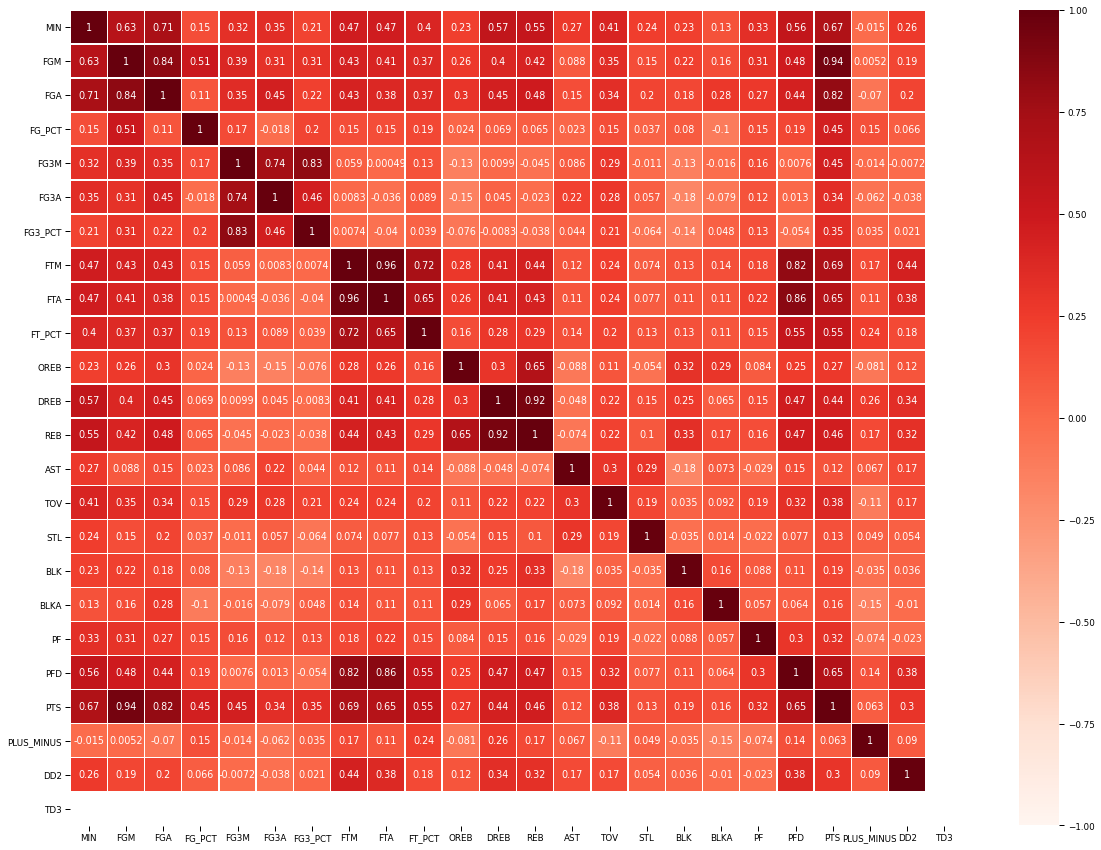

In [29]:
# import seaborn as sns
plt.figure(figsize=(20,15))
sns.set_context("paper", font_scale=1)

# sns.heatmap(df.corr(), annot=True, cmap='Blues',vmin=-1, vmax=1, square=False, linewidths=0.5)
print("")
print("Pre Season")
sns.heatmap(df_X_PreSeason.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
# display(df_X_PreSeason)



Regular Season


<AxesSubplot:>

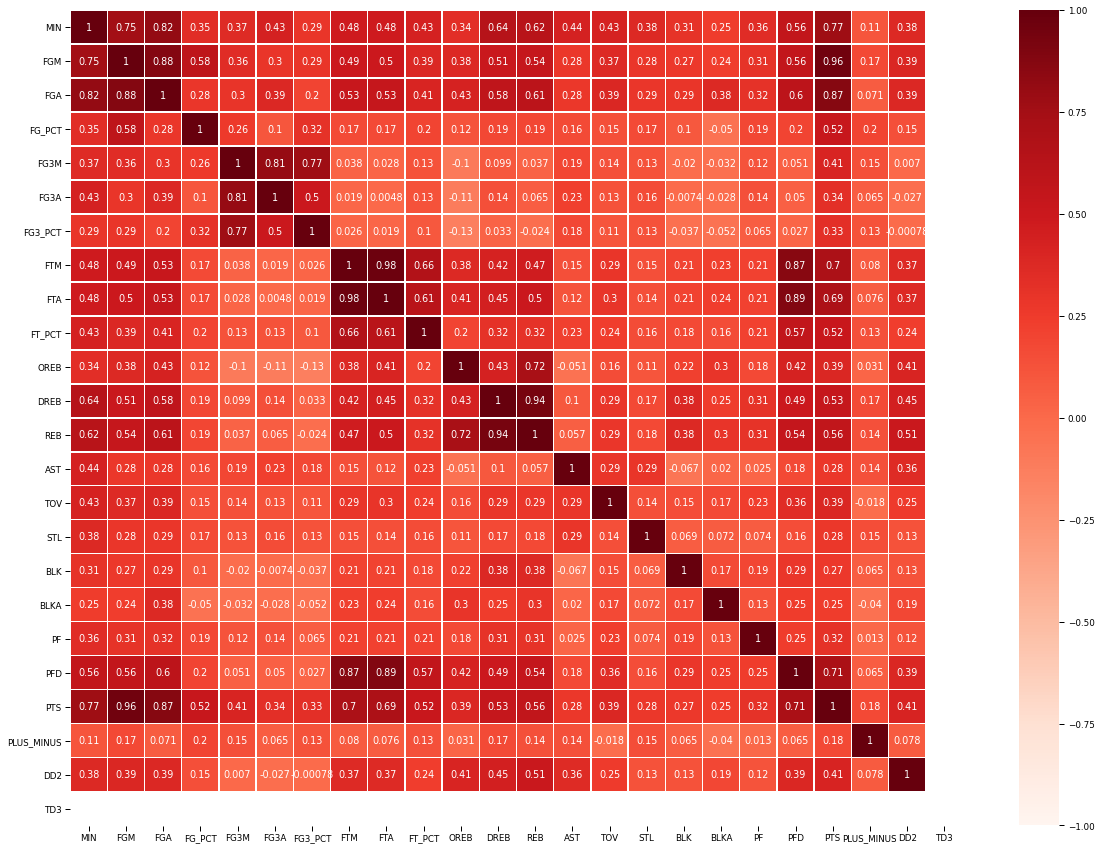

In [30]:
plt.figure(figsize=(20,15))
sns.set_context("paper", font_scale=1)
print("")
print("Regular Season")
sns.heatmap(df_X_RegularSeason.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
# display(df_X_RegularSeason)



Playoffs


<AxesSubplot:>

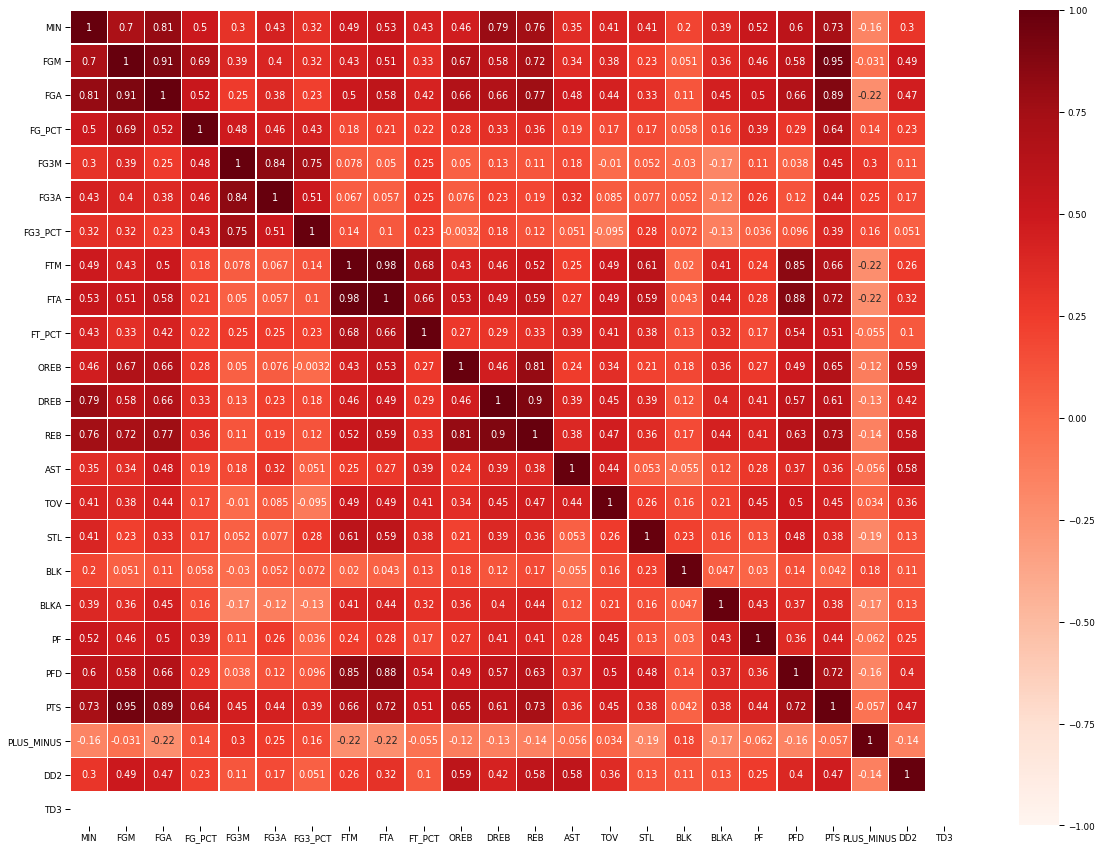

In [31]:
plt.figure(figsize=(20,15))
sns.set_context("paper", font_scale=1)
print("")
print("Playoffs")
sns.heatmap(df_X_Playoffs.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
# display(df_X_Playoffs)

## Section : Remove additional unwanted fields based on Heat Map / Correlation Matrix

In [32]:
## Analysis of heat maps
### Removed anything over 0.8
#### PTS, FGA, FG3M, FTM, PFD, REB




### Preseason
#### FGM or PTS
#### FGM or FGA
#### FG3M vs FG3_PCT
#### PFD vs FTM FTA
#### REB vs DREB

### Reg Season
#### FGM vs PTS
#### FGA vs PTS
#### FGM vs FGA
#### FGA vs MIN
#### FG3A vs FG3M
#### FTM vs FTA
#### FTM vs PFD
#### FTA vs PFD
#### REB vs DREB


### Playoffs
#### FGM vs FGA
#### FGM vs PTS
#### FGA vs PTS
#### FGA vs MIN
#### FG3A vs FG3M
#### FTA vs FTM
#### FTM vs PFD
#### FTA vs PFD
#### REB vs DREB
#### REB vs OREB

In [33]:
# Remove unwanted/useless features. anything over 80% was removed
# unwanted_list_02 = ['PTS', 'FGA', 'FG3M', 'FTM', 'PFD', 'REB', 'TD3']
unwanted_list_02 = []

for gameType in gameTypeListed_code:
    if gameType == 0:
        df_X_PreSeason = df_X_PreSeason.drop(unwanted_list_02, axis=1)
    elif gameType == 1:
        df_X_RegularSeason = df_X_RegularSeason.drop(unwanted_list_02, axis=1)
    elif gameType == 2:
        df_X_Playoffs = df_X_Playoffs.drop(unwanted_list_02, axis=1)


# Remaining features and after removal of unwanted features in the dataframes
# VALIDATION CODE 
if debug_active == 'yes':
    display(X_headers_list)
    display(df_X_PreSeason)
    display(df_X_RegularSeason)
    display(df_X_Playoffs)    

['MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 'PTS',
 'PLUS_MINUS',
 'DD2',
 'TD3',
 'Game_Type',
 'SEASON_YEAR_code']

MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  \
4      20.666667    5    9   0.556     0     0      0.0    1    2     0.5   
10      4.566667    2    3   0.667     1     2      0.5    0    0     0.0   
11      5.450000    1    1   1.000     0     0      0.0    3    3     1.0   
13     18.700000    2    6   0.333     1     2      0.5    0    0     0.0   
14     19.833333    1    4   0.250     0     0      0.0    0    0     0.0   
...          ...  ...  ...     ...   ...   ...      ...  ...  ...     ...   
31623  20.983333    4    6   0.667     3     3      1.0    1    2     0.5   
31642  26.450000    4    5   0.800     2     2      1.0    0    0     0.0   
31652  22.966667    5   10   0.500     0     0      0.0    3    6     0.5   
31672  27.533333    4    8   0.500     2     4      0.5    0    0     0.0   
31678  27.016667    4   12   0.333     0     4      0.0    0    0     0.0   

       ...  TOV  STL  BLK  BLKA  PF  PFD  PTS  PLUS_MINUS  DD2  TD3  
4      ...    0    1    0     0   4    2   11          23    0    0  
10     ...    0    0    0     0   1    0    5          10    0    0  
11     ...    0    0    0     0   0    2    5          11    0    0  
13     ...    0    1    0     0   0    1    5          19    0    0  
14     ...    1    1    0     1   1    0    2           2    0    0  
...    ...  ...  ...  ...   ...  ..  ...  ...         ...  ...  ...  
31623  ...    3    2    0     0   4    1   12          -2    0    0  
31642  ...    2    0    0     0   3    1   10           6    0    0  
31652  ...    1    1    1     0   2    3   13          -3    0    0  
31672  ...    1    1    1     1   3    2   10           8    0    0  
31678  ...    1    3    0     0   2    1    8           4    0    0  

[158 rows x 24 columns]

MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  \
2613   18.316667    7    9   0.778     1     1     1.00    3    3     1.0   
2668   15.233333    3    8   0.375     0     1     0.00    2    2     1.0   
2688   20.683333    5   11   0.455     1     4     0.25    2    2     1.0   
2747   15.133333    1    2   0.500     0     0     0.00    0    0     0.0   
2765   13.603333    3    6   0.500     0     0     0.00    0    0     0.0   
...          ...  ...  ...     ...   ...   ...      ...  ...  ...     ...   
56376  34.116667    7   15   0.467     0     1     0.00    3    3     1.0   
56380  32.695000    5    9   0.556     3     5     0.60    0    0     0.0   
56423   8.750000    2    7   0.286     0     0     0.00    0    0     0.0   
56433  37.683333    3   11   0.273     3     5     0.60    0    0     0.0   
56462  25.566667    6    8   0.750     3     4     0.75    0    0     0.0   

       ...  TOV  STL  BLK  BLKA  PF  PFD  PTS  PLUS_MINUS  DD2  TD3  
2613   ...    2    4    0     0   0    3   18           3    0    0  
2668   ...    2    0    1     0   2    2    8           6    0    0  
2688   ...    1    1    1     1   4    1   13         -10    0    0  
2747   ...    0    0    0     0   3    1    2           5    0    0  
2765   ...    0    0    0     0   0    0    6          -4    0    0  
...    ...  ...  ...  ...   ...  ..  ...  ...         ...  ...  ...  
56376  ...    2    0    1     0   5    4   17           0    0    0  
56380  ...    1    1    0     2   5    1   13           4    0    0  
56423  ...    0    0    0     2   2    0    4           2    0    0  
56433  ...    0    2    0     1   2    0    9          11    0    0  
56462  ...    2    0    0     0   1    1   15           9    0    0  

[1694 rows x 24 columns]

MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  \
28590  39.111667    7   19   0.368     0     0    0.000    2    4   0.500   
28595  15.916667    2    4   0.500     0     2    0.000    0    0   0.000   
28602  24.283333    6   14   0.429     0     2    0.000    2    2   1.000   
28603   8.888333    0    0   0.000     0     0    0.000    0    0   0.000   
28622  43.983333    3    8   0.375     1     3    0.333    4    4   1.000   
28623  24.433333    3    6   0.500     2     2    1.000    0    0   0.000   
28625  29.216667    3   11   0.273     2     5    0.400    6    6   1.000   
28629  30.450000    6   13   0.462     1     4    0.250    0    1   0.000   
28639  23.716667    5   10   0.500     2     4    0.500    0    0   0.000   
28739   0.550000    0    0   0.000     0     0    0.000    0    0   0.000   
28742   0.590000    0    0   0.000     0     0    0.000    0    0   0.000   
28753  39.843333   16   26   0.615     0     1    0.000    7   10   0.700   
28763  30.358333    6   16   0.375     0     3    0.000    0    1   0.000   
28775  17.456667    1    3   0.333     0     0    0.000    1    2   0.500   
28779  37.093333    6   13   0.462     0     2    0.000    0    0   0.000   
28788  20.033333    2    5   0.400     0     1    0.000    0    0   0.000   
28791   0.590000    0    0   0.000     0     0    0.000    0    0   0.000   
28796  18.583333    1    7   0.143     1     3    0.333    2    2   1.000   
28802  21.251667    1    7   0.143     0     1    0.000    0    0   0.000   
28803  34.450000    5    9   0.556     1     2    0.500    1    1   1.000   
28804  19.200000    2    6   0.333     0     2    0.000    1    1   1.000   
28883  23.133333    7   11   0.636     1     1    1.000    6    6   1.000   
28884  10.066667    1    3   0.333     0     0    0.000    0    0   0.000   
28897  24.250000    6   10   0.600     3     6    0.500    0    0   0.000   
28899  37.055000    4   10   0.400     1     4    0.250    1    2   0.500   
28906  23.021667    4   11   0.364     1     5    0.200    0    0   0.000   
28907  24.866667    6   11   0.545     4     8    0.500    2    2   1.000   
28914  37.198333    6   14   0.429     0     3    0.000    3    4   0.750   
28927  27.073333    3    6   0.500     1     4    0.250    0    0   0.000   
28928  33.335000    5    9   0.556     1     3    0.333    0    0   0.000   
28999   5.100000    1    1   1.000     0     0    0.000    0    0   0.000   
29000  24.050000    7   11   0.636     3     5    0.600    1    1   1.000   
29002  29.850000    6   10   0.600     1     4    0.250    3    4   0.750   
29007  18.116667    4    9   0.444     1     5    0.200    0    0   0.000   
29014  32.516667    8   12   0.667     4     6    0.667    0    0   0.000   
29015  23.950000    1    8   0.125     0     1    0.000    4    4   1.000   
29018  38.423333    0    4   0.000     0     2    0.000    0    0   0.000   
29023  22.243333    1    7   0.143     1     4    0.250    0    0   0.000   
29034   0.826667    0    0   0.000     0     0    0.000    0    0   0.000   
29042  44.923333    9   19   0.474     1     2    0.500   10   11   0.909   
29101  22.333333    1    9   0.111     0     1    0.000    3    3   1.000   
29110  35.533333    8   15   0.533     0     0    0.000    0    0   0.000   
29121  25.666667    3   11   0.273     1     3    0.333    2    2   1.000   
29124  39.233333    7   14   0.500     3     6    0.500    7    8   0.875   
29136   4.800000    0    1   0.000     0     0    0.000    0    0   0.000   
29145   1.200000    0    2   0.000     0     1    0.000    0    0   0.000   
29156   0.231667    0    0   0.000     0     0    0.000    0    0   0.000   
29157  28.250000    2    8   0.250     1     1    1.000    0    0   0.000   
29158  37.701667    4   11   0.364     0     1    0.000   13   13   1.000   
29160  30.550000    6    9   0.667     4     6    0.667    2    2   1.000   
29167  14.500000    1    5   0.200     0     1    0.000    0    0   0.000   

       .

## Section : Re-check Heat Map / Correlation Matrix


Pre Season


<AxesSubplot:>

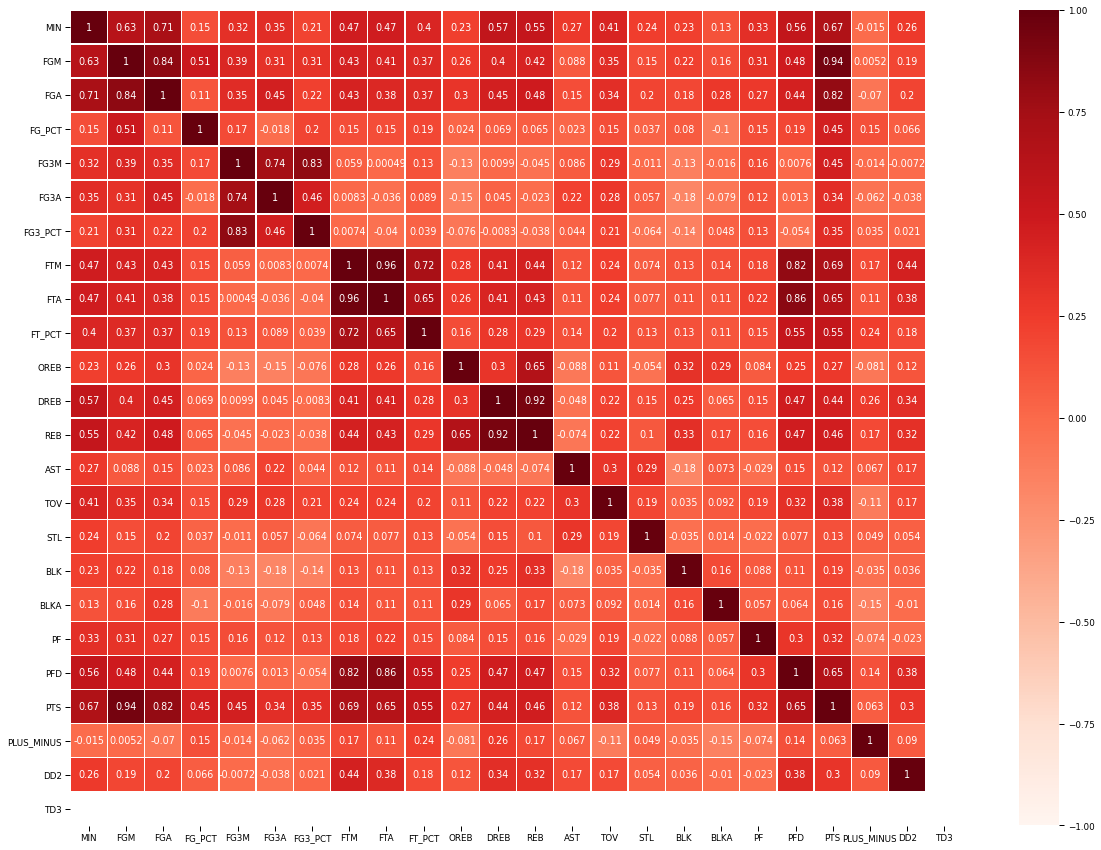

In [34]:
# import seaborn as sns
plt.figure(figsize=(20,15))
sns.set_context("paper", font_scale=1)
print("")
print("Pre Season")
sns.heatmap(df_X_PreSeason.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
# display(df_X_PreSeason)



Regular Season


<AxesSubplot:>

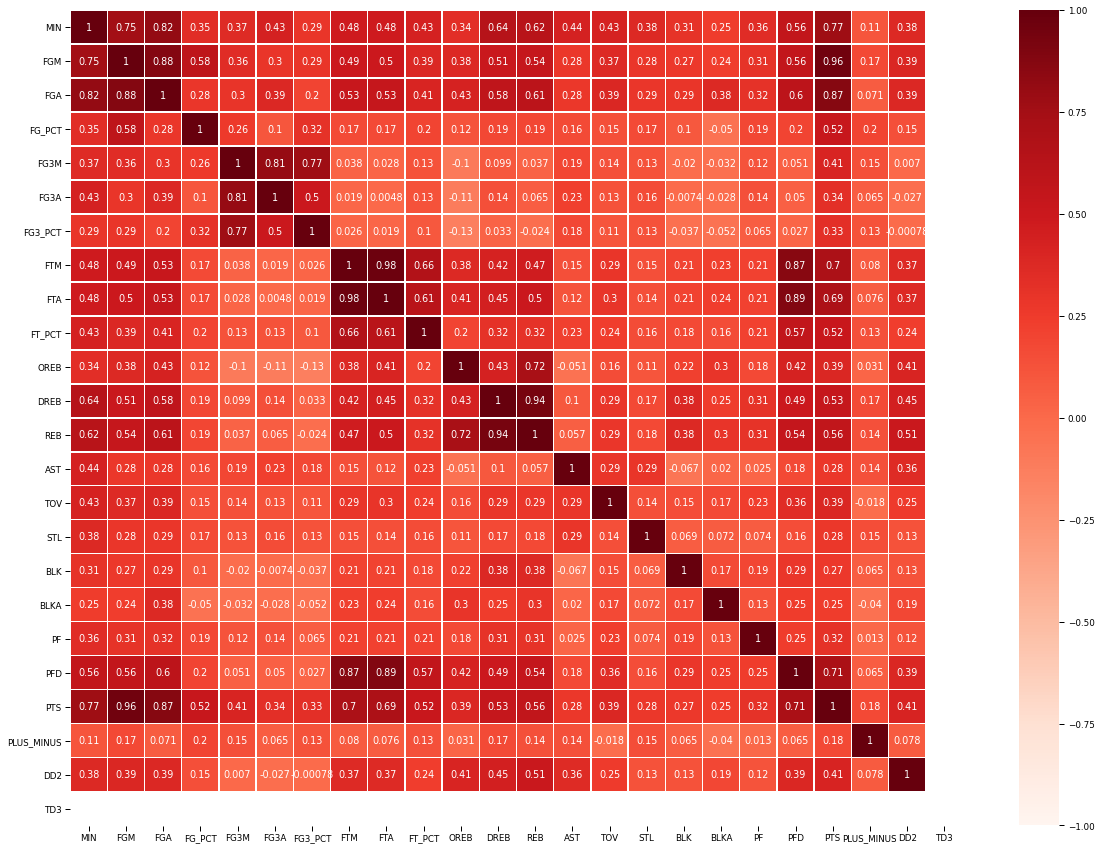

In [35]:
plt.figure(figsize=(20,15))
sns.set_context("paper", font_scale=1)
print("")
print("Regular Season")
sns.heatmap(df_X_RegularSeason.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
# display(df_X_RegularSeason)


Playoffs


<AxesSubplot:>

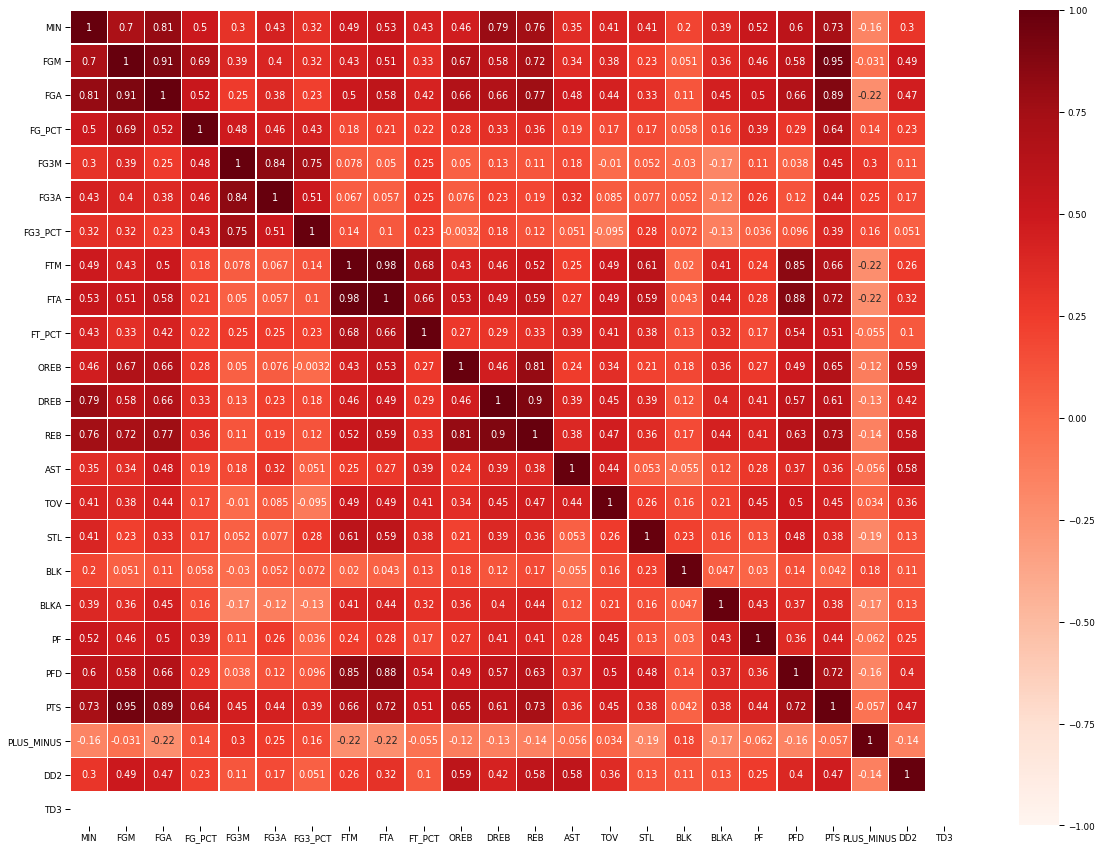

In [36]:
plt.figure(figsize=(20,15))
sns.set_context("paper", font_scale=1)
print("")
print("Playoffs")
sns.heatmap(df_X_Playoffs.corr(), annot=True, cmap='Reds',vmin=-1, vmax=1, square=False, linewidths=0.5)
# display(df_X_Playoffs)

# Section 6: Modeling and Analysis

## Section 6a: Prepare train and test data

In [37]:
# Select a season 
# gameTypeListed = ['Pre Season', 'Regular Season', 'Playoffs']
# gameTypeListed_code = [1, 2, 0]

if gameTypeToProcess == 0:
    X = df_X_PreSeason
    Y = df_Y_PreSeason
elif gameTypeToProcess == 1:
    X = df_X_RegularSeason
    Y = df_Y_RegularSeason
elif gameTypeToProcess == 2:
    X = df_X_Playoffs
    Y = df_Y_Playoffs

# Split the code into training and test dataset 0.7/0.3
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = test_size_val, random_state = random_state_val)

# Validate the split at a high level
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

# VALIDATION CODE 
if debug_active == 'yes':
    print('Season Type: ', gameTypeToProcess)
    df_Encoded.to_csv('DAT205_Output_All.csv') 
    X_train.to_csv('DAT205_Output_Split_X_train.csv') 
    X_test.to_csv('DAT205_Output_Split_X_test.csv') 
    Y_train.to_csv('DAT205_Output_Split_Y_train.csv') 
    Y_test.to_csv('DAT205_Output_Split_Y_test.csv') 
    display(X_train)
    display(Y_train)


(1185, 24) (1185, 1)
(509, 24) (509, 1)
Season Type:  1


MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  \
24376  25.533333    6   10   0.600     0     2    0.000    2    2   1.000   
5233   14.733333    2    6   0.333     1     4    0.250    1    1   1.000   
33332  35.000000    6   11   0.545     3     5    0.600    1    1   1.000   
42089  33.450000    1    9   0.111     0     2    0.000    0    0   0.000   
53606  19.188333    2    4   0.500     0     1    0.000    4    5   0.800   
...          ...  ...  ...     ...   ...   ...      ...  ...  ...     ...   
40189  25.950000    7   12   0.583     0     0    0.000    5    6   0.833   
45048  34.115000    3    9   0.333     0     2    0.000    5    5   1.000   
27265  12.250000    2    4   0.500     0     0    0.000    0    0   0.000   
49416  35.523333    3   14   0.214     1     7    0.143    0    0   0.000   
40123  28.800000    7   15   0.467     0     0    0.000    0    0   0.000   

       ...  TOV  STL  BLK  BLKA  PF  PFD  PTS  PLUS_MINUS  DD2  TD3  
24376  ...    2    1    0     0   2    2   14          -3    0    0  
5233   ...    2    1    0     1   2    1    6         -15    0    0  
33332  ...    2    3    2     1   1    0   16          -2    1    0  
42089  ...    3    1    0     1   2    0    2         -24    0    0  
53606  ...    0    1    2     0   0    3    8           9    0    0  
...    ...  ...  ...  ...   ...  ..  ...  ...         ...  ...  ...  
40189  ...    1    0    0     0   1    3   19         -14    0    0  
45048  ...    1    1    1     0   2    3   11           4    0    0  
27265  ...    1    0    0     0   0    0    4          -2    0    0  
49416  ...    0    0    0     0   0    1    7          -5    0    0  
40123  ...    1    0    0     0   0    0   14         -25    1    0  

[1185 rows x 24 columns]

WL
24376   0
5233    1
33332   0
42089   0
53606   1
...    ..
40189   0
45048   0
27265   1
49416   0
40123   0

[1185 rows x 1 columns]

In [38]:
# VALIDATION CODE 
if debug_active == 'yes':
    display(X)
    display(Y)

MIN  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  \
2613   18.316667    7    9   0.778     1     1     1.00    3    3     1.0   
2668   15.233333    3    8   0.375     0     1     0.00    2    2     1.0   
2688   20.683333    5   11   0.455     1     4     0.25    2    2     1.0   
2747   15.133333    1    2   0.500     0     0     0.00    0    0     0.0   
2765   13.603333    3    6   0.500     0     0     0.00    0    0     0.0   
...          ...  ...  ...     ...   ...   ...      ...  ...  ...     ...   
56376  34.116667    7   15   0.467     0     1     0.00    3    3     1.0   
56380  32.695000    5    9   0.556     3     5     0.60    0    0     0.0   
56423   8.750000    2    7   0.286     0     0     0.00    0    0     0.0   
56433  37.683333    3   11   0.273     3     5     0.60    0    0     0.0   
56462  25.566667    6    8   0.750     3     4     0.75    0    0     0.0   

       ...  TOV  STL  BLK  BLKA  PF  PFD  PTS  PLUS_MINUS  DD2  TD3  
2613   ...    2    4    0     0   0    3   18           3    0    0  
2668   ...    2    0    1     0   2    2    8           6    0    0  
2688   ...    1    1    1     1   4    1   13         -10    0    0  
2747   ...    0    0    0     0   3    1    2           5    0    0  
2765   ...    0    0    0     0   0    0    6          -4    0    0  
...    ...  ...  ...  ...   ...  ..  ...  ...         ...  ...  ...  
56376  ...    2    0    1     0   5    4   17           0    0    0  
56380  ...    1    1    0     2   5    1   13           4    0    0  
56423  ...    0    0    0     2   2    0    4           2    0    0  
56433  ...    0    2    0     1   2    0    9          11    0    0  
56462  ...    2    0    0     0   1    1   15           9    0    0  

[1694 rows x 24 columns]

WL
2613    0
2668    0
2688    0
2747    0
2765    0
...    ..
56376   1
56380   1
56423   1
56433   1
56462   1

[1694 rows x 1 columns]

## Section 6b: Apply Logistic Regression on the split train/test dataset

In [39]:
# np.isnan(df_Encoded.any())
# np.isfinite(df_Encoded.all())

# np.any(np.isnan(df_Encoded))
# np.all(np.isfinite(df_Encoded))

In [40]:
# Notes
# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None, max_iter=100,
#                    multi_class='warn', n_jobs=None, penalty='l2',
#                    random_state=0, solver='liblinear', tol=0.0001, verbose=0,
#                    warm_start=False)

# Create the model
LogRegM = LogisticRegression(C=1, solver='liblinear', random_state = random_state_val)

# Train the model
LogRegM.fit(X_train, Y_train.values.ravel())

# Predict using test data
Y_pred = LogRegM.predict(X_test)

# Y_pred = pd.DataFrame(Y_pred, columns = ["WL_code"])
# df = pd.DataFrame(data=numpy_data, index=["row1", "row2"], columns=["column1", "column2"])
# VALIDATION CODE 
if debug_active == 'yes':
    display(Y_pred)

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,

## Confusion Matrix Analysis Notes
https://www.google.com/search?q=confusion+matrix&rlz=1C1GCEA_enCA849CA849&oq=confusion+&aqs=chrome.1.69i57j0i433l2j0j0i433j0l5.2966j0j7&sourceid=chrome&ie=UTF-8

## Analysis score notes 
https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case

### Compute your model’s analysis

In [41]:
accuracy_score_LogRegM = accuracy_score(Y_test, Y_pred)
f1_score_LogRegM = f1_score(Y_test, Y_pred)
recall_score_LogRegM = recall_score(Y_test, Y_pred)
precision_score_LogRegM = precision_score(Y_test, Y_pred)
classification_report_LogRegM = classification_report(Y_test, Y_pred)
confusion_matrix_LogRegM = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix_LogRegM
sensitivity_LogRegM = cm[0,0]/(cm[0,0]+cm[0,1])
specificity_LogRegM = cm[1,1]/(cm[1,0]+cm[1,1])


# VALIDATION CODE 
if debug_active == 'yes':
    print('Accuracy:', numFormat.format(accuracy_score_LogRegM))
    print('F1 score:', numFormat.format(f1_score_LogRegM))
    print('Recall:', numFormat.format(recall_score_LogRegM))
    print('Precision:', numFormat.format(precision_score_LogRegM))
    print('Sensitivity : ', numFormat.format(sensitivity_LogRegM))
    print('Specificity : ', numFormat.format(specificity_LogRegM))
    print('\n clasification report:\n', classification_report_LogRegM)
    print('\n confussion matrix:\n',confusion_matrix_LogRegM)

Accuracy: 0.7367
F1 score: 0.6898
Recall: 0.6652
Precision: 0.7163
Sensitivity :  0.7930
Specificity :  0.6652

 clasification report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       285
           1       0.72      0.67      0.69       224

    accuracy                           0.74       509
   macro avg       0.73      0.73      0.73       509
weighted avg       0.74      0.74      0.74       509


 confussion matrix:
 [[226  59]
 [ 75 149]]


In [42]:
# Feature Importance
importance = LogRegM.coef_[0]
array_importance=[]
# summarize feature importance
for i,v in enumerate(importance):
    array_importance.append(v)
    # print('Feature: %0d, Score: %.5f' % (i,v))

# # Convert to dataframe feature_importances results
df_feature_importance_values = pd.DataFrame(array_importance)
df_feature_importance_values.rename(columns={0:'Feature Importance'}, inplace=True)

# # Convert to dataframe feature labels
df_feature_names = pd.DataFrame(list(X.columns))
df_feature_names.rename(columns={0:'Feature'}, inplace=True)

# # Merge the dataframes for feature labels and feature_importances results
df_feature_importance_LogRegM = pd.concat([df_feature_names, df_feature_importance_values], axis=1)
# df_feature_importance

df_feature_importance_LogRegM.sort_values('Feature Importance', ascending=False, inplace=True)

# VALIDATION CODE 
if debug_active == 'yes':
    df_feature_importance_LogRegM

## Section 6c:  Apply Decision Tree Classifier on the split train/test dataset



In [43]:
# Create the model
DTM = DecisionTreeClassifier()

# Train the model
DTM.fit(X_train, Y_train)

# Predict using test data
Y_pred = DTM.predict(X_test)

In [44]:
accuracy_score_DTM = accuracy_score(Y_test, Y_pred)
f1_score_DTM = f1_score(Y_test, Y_pred)
recall_score_DTM = recall_score(Y_test, Y_pred)
precision_score_DTM = precision_score(Y_test, Y_pred)
classification_report_DTM = classification_report(Y_test, Y_pred)
confusion_matrix_DTM = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix_DTM
sensitivity_DTM = cm[0,0]/(cm[0,0]+cm[0,1])
specificity_DTM = cm[1,1]/(cm[1,0]+cm[1,1])

# VALIDATION CODE 
if debug_active == 'yes':
    print('Accuracy:', numFormat.format(accuracy_score_DTM))
    print('F1 score:', numFormat.format(f1_score_DTM))
    print('Recall:', numFormat.format(recall_score_DTM))
    print('Precision:', numFormat.format(precision_score_DTM))
    print('Sensitivity : ', numFormat.format(sensitivity_DTM))
    print('Specificity : ', numFormat.format(specificity_DTM))
    print('\n clasification report:\n', classification_report_DTM)
    print('\n confussion matrix:\n',confusion_matrix_DTM)

Accuracy: 0.7132
F1 score: 0.6726
Recall: 0.6696
Precision: 0.6757
Sensitivity :  0.7474
Specificity :  0.6696

 clasification report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.74       285
           1       0.68      0.67      0.67       224

    accuracy                           0.71       509
   macro avg       0.71      0.71      0.71       509
weighted avg       0.71      0.71      0.71       509


 confussion matrix:
 [[213  72]
 [ 74 150]]


In [45]:
# Feature Importance
importance = DTM.feature_importances_
array_importance=[]
# summarize feature importance
for i,v in enumerate(importance):
    array_importance.append(v)
    # print('Feature: %0d, Score: %.5f' % (i,v))

# # Convert to dataframe feature_importances results
df_feature_importance_values = pd.DataFrame(array_importance)
df_feature_importance_values.rename(columns={0:'Feature Importance'}, inplace=True)

# # Convert to dataframe feature labels
df_feature_names = pd.DataFrame(list(X.columns))
df_feature_names.rename(columns={0:'Feature'}, inplace=True)

# # Merge the dataframes for feature labels and feature_importances results
df_feature_importance_DTM = pd.concat([df_feature_names, df_feature_importance_values], axis=1)
# df_feature_importance

df_feature_importance_DTM.sort_values('Feature Importance', ascending=False, inplace=True)

# VALIDATION CODE 
if debug_active == 'yes':
    df_feature_importance_DTM

## Section 6d: Apply Random Forest Classifier on the split train/test dataset

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
# Create the model
RFM = RandomForestClassifier(max_depth=2, random_state=0)

# Train the model
RFM.fit(X_train, Y_train.values.ravel())

# Predict using test data
Y_pred = RFM.predict(X_test)

In [48]:
accuracy_score_RFM = accuracy_score(Y_test, Y_pred)
f1_score_RFM = f1_score(Y_test, Y_pred)
recall_score_RFM = recall_score(Y_test, Y_pred)
precision_score_RFM = precision_score(Y_test, Y_pred)
classification_report_RFM = classification_report(Y_test, Y_pred)
confusion_matrix_RFM = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix_RFM
sensitivity_RFM = cm[0,0]/(cm[0,0]+cm[0,1])
specificity_RFM = cm[1,1]/(cm[1,0]+cm[1,1])

# VALIDATION CODE 
if debug_active == 'yes':
    print('Accuracy:', numFormat.format(accuracy_score_RFM))
    print('F1 score:', numFormat.format(f1_score_RFM))
    print('Recall:', numFormat.format(recall_score_RFM))
    print('Precision:', numFormat.format(precision_score_RFM))
    print('Sensitivity : ', numFormat.format(sensitivity_RFM))
    print('Specificity : ', numFormat.format(specificity_RFM))
    print('\n clasification report:\n', classification_report_RFM)
    print('\n confussion matrix:\n',confusion_matrix_RFM)

Accuracy: 0.7387
F1 score: 0.6376
Recall: 0.5223
Precision: 0.8182
Sensitivity :  0.9088
Specificity :  0.5223

 clasification report:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80       285
           1       0.82      0.52      0.64       224

    accuracy                           0.74       509
   macro avg       0.76      0.72      0.72       509
weighted avg       0.76      0.74      0.73       509


 confussion matrix:
 [[259  26]
 [107 117]]


In [49]:
# Feature Importance
importance = RFM.feature_importances_
array_importance=[]
# summarize feature importance
for i,v in enumerate(importance):
    array_importance.append(v)
    # print('Feature: %0d, Score: %.5f' % (i,v))

# # Convert to dataframe feature_importances results
df_feature_importance_values = pd.DataFrame(array_importance)
df_feature_importance_values.rename(columns={0:'Feature Importance'}, inplace=True)

# # Convert to dataframe feature labels
df_feature_names = pd.DataFrame(list(X.columns))
df_feature_names.rename(columns={0:'Feature'}, inplace=True)

# # Merge the dataframes for feature labels and feature_importances results
df_feature_importance_RFM = pd.concat([df_feature_names, df_feature_importance_values], axis=1)
# df_feature_importance

df_feature_importance_RFM.sort_values('Feature Importance', ascending=False, inplace=True)

# VALIDATION CODE 
if debug_active == 'yes':
    df_feature_importance_RFM

# Section 7: Cross Validation Scores

In [50]:
seed = random_state_val
# seed = 0

loan_models = []
# loan_models.append(('Logistic Regression', LogisticRegression()))
loan_models.append(('Decision Tree', DecisionTreeClassifier()))
# loan_models.append(('KNN', KNeighborsClassifier()))
# loan_models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
# loan_models.append(('Gaussian', GaussianNB()))
# loan_models.append(('SVM', SVC()))
loan_models.append(('Random Forest', RandomForestClassifier()))

cross_val_scores = []
model_keys = []

df_cross_val_score = []
df_cross_val_score_headers = [0,1,2,3]
df_cross_val_score = pd.DataFrame (df_cross_val_score, columns = df_cross_val_score_headers)

# VALIDATION CODE 
# if debug_active == 'yes':
#     nullFieldAnalysis(df_cross_val_score)

df_Addscore = []
scoring = 'accuracy'
for model_key, loan_model in loan_models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cross_val_score = model_selection.cross_val_score(loan_model, X_train, Y_train.values.ravel(), cv=kfold, scoring=scoring)
    cross_val_scores.append(cross_val_score)
    model_keys.append(model_key)
    msg = "%s: cross val mean -> %f , cross val std -> %f, kfold variance -> %f" % (model_key, cross_val_score.mean(), cross_val_score.std(), cross_val_score.var())
    df_Addscore = pd.Series([model_key, cross_val_score.mean(), cross_val_score.std(), cross_val_score.var()])
    df_cross_val_score = df_cross_val_score.append(df_Addscore, ignore_index=True)
    print(msg)

df_cross_val_score.columns = ['Model_Key','Cross_Value_Score_Mean','Cross_Value_Score_STD','Cross_Value_Score_Var']
# VALIDATION CODE 
if debug_active == 'yes':
    print("")
    print("VALIDATION RESULT")
    display(df_cross_val_score)
    print(model_keys)
    print(cross_val_scores)

Decision Tree: cross val mean -> 0.649024 , cross val std -> 0.048021, kfold variance -> 0.002306
Random Forest: cross val mean -> 0.708916 , cross val std -> 0.048019, kfold variance -> 0.002306

VALIDATION RESULT


Model_Key  Cross_Value_Score_Mean  Cross_Value_Score_STD  \
0  Decision Tree                0.649024               0.048021   
1  Random Forest                0.708916               0.048019   

   Cross_Value_Score_Var  
0               0.002306  
1               0.002306

['Decision Tree', 'Random Forest']
[array([0.54621849, 0.65546218, 0.64705882, 0.61344538, 0.68907563,
       0.66949153, 0.60169492, 0.70338983, 0.65254237, 0.71186441]), array([0.68067227, 0.66386555, 0.73109244, 0.63865546, 0.76470588,
       0.76271186, 0.70338983, 0.69491525, 0.66101695, 0.78813559])]


In [51]:
# # WORK IN PROGRESS

# # boxplot algorithm comparison

# # plt.rcParams["figure.figsize"] = (15,10)
# # fig = plt.figure()
# # fig.suptitle('Model Comparison')
# # ax = fig.add_subplot(111)
# # sns.boxplot(x = model_keys, y=cross_val_scores, palette = 'Blues')
# # plt.show()

# # plt.style.use('ggplot')
# plotX = pd.Series(model_keys)
# plotY = pd.Series(cross_val_scores)

# df = pd.DataFrame({"model_keys" : plotX, "cross_val_scores" : plotY})
# # plt.rcParams["figure.figsize"] = (15,10)
# # fig = plt.figure()
# # fig.suptitle('Model Comparison')
# # ax = fig.add_subplot(111)
# sns.set(style="whitegrid")
# sns.boxplot(data=df, palette = 'Blues')



# # plt.style.use('ggplot')
# # dummyData.groupby(['quarter', 'brand'])\
# #       .brand.count().unstack().plot.bar(legend=True)
# plt.show()

In [52]:
# TEST CODE

# print(model_keys)
# print(cross_val_scores)


# print(plotX)
# print(plotY)

# Section 8: Summary Report

In [53]:
# Create summary table of metric analysis
df_Metrics = []

df_Metrics_headers = [0,1,2,3,4,5,6]
df_Metrics = pd.DataFrame (df_Metrics, columns = df_Metrics_headers)


df_AddModel = pd.Series(['Decision Tree',accuracy_score_DTM,f1_score_DTM,recall_score_DTM,precision_score_DTM,sensitivity_DTM,specificity_DTM])
df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

# df_AddModel = pd.Series(['K Nearest Neighbors',accuracy_score_KNNM,f1_score_KNNM,recall_score_KNNM,precision_score_KNNM,sensitivity_KNNM,specificity_KNNM])
# df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

# df_AddModel = pd.Series(['Linear Discriminant Analysis',accuracy_score_LDAM,f1_score_LDAM,recall_score_LDAM,precision_score_LDAM,sensitivity_LDAM,specificity_LDAM])
# df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

# df_AddModel = pd.Series(['Gaussian Naive Bayes',accuracy_score_GNBM,f1_score_GNBM,recall_score_GNBM,precision_score_GNBM,sensitivity_GNBM,specificity_GNBM])
# df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

# df_AddModel = pd.Series(['SVM',accuracy_score_SVMM,f1_score_SVMM,recall_score_SVMM,precision_score_SVMM,sensitivity_SVMM,specificity_SVMM])
# df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

df_AddModel = pd.Series(['Random Forest',accuracy_score_RFM,f1_score_RFM,recall_score_RFM,precision_score_RFM,sensitivity_RFM,specificity_RFM])
df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

df_AddModel = pd.Series(['Logistic Regression', accuracy_score_LogRegM,f1_score_LogRegM,recall_score_LogRegM,precision_score_LogRegM,sensitivity_LogRegM,specificity_LogRegM])
df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

df_Metrics.columns = ['Model','Accuracy','F1 score','Recall','Precision','Sensitivity','Specificity']

# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Metrics)

# Join dataframes for Metrics and cross_val_scores
df_Summary = pd.concat([df_Metrics,df_cross_val_score], axis=1)
# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Summary)

Model  Accuracy  F1 score    Recall  Precision  Sensitivity  \
0        Decision Tree  0.713163  0.672646  0.669643   0.675676     0.747368   
1        Random Forest  0.738703  0.637602  0.522321   0.818182     0.908772   
2  Logistic Regression  0.736739  0.689815  0.665179   0.716346     0.792982   

   Specificity  
0     0.669643  
1     0.522321  
2     0.665179

Model  Accuracy  F1 score    Recall  Precision  Sensitivity  \
0        Decision Tree  0.713163  0.672646  0.669643   0.675676     0.747368   
1        Random Forest  0.738703  0.637602  0.522321   0.818182     0.908772   
2  Logistic Regression  0.736739  0.689815  0.665179   0.716346     0.792982   

   Specificity      Model_Key  Cross_Value_Score_Mean  Cross_Value_Score_STD  \
0     0.669643  Decision Tree                0.649024               0.048021   
1     0.522321  Random Forest                0.708916               0.048019   
2     0.665179            NaN                     NaN                    NaN   

   Cross_Value_Score_Var  
0               0.002306  
1               0.002306  
2                    NaN

In [54]:
# Clean up columns by dropping columns of duplicate data (Model_Key)
df_Summary.drop(['Model_Key'], axis=1, inplace=True)
# df_Summary.drop(columns=['Model_Key'], inplace=True)
# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Summary)


Model  Accuracy  F1 score    Recall  Precision  Sensitivity  \
0        Decision Tree  0.713163  0.672646  0.669643   0.675676     0.747368   
1        Random Forest  0.738703  0.637602  0.522321   0.818182     0.908772   
2  Logistic Regression  0.736739  0.689815  0.665179   0.716346     0.792982   

   Specificity  Cross_Value_Score_Mean  Cross_Value_Score_STD  \
0     0.669643                0.649024               0.048021   
1     0.522321                0.708916               0.048019   
2     0.665179                     NaN                    NaN   

   Cross_Value_Score_Var  
0               0.002306  
1               0.002306  
2                    NaN

In [62]:
print("================= Results Summary ==================\n")

print("\n==================== Configuration ======================")
print('Filter by Team Selected = ', teamSelected)
print('Process unit size = ', processSize)

print('Game Type Processed (0 = PreSeason / 1 = RegularSeason / 2 = Playoffs) = ', gameTypeToProcess)
print('Total Number of Records (Initial Dataset) = ', totalNumRec)
print('Total Number of Records (Transformed and Filtered Dataset) = ', df_TF.shape[0])
print('Train / Test Split = ', test_size_val)
print('Model random_state_val = ', random_state_val)

print("\n==================== Features ======================")
print('----------------- Removed Features -----------------')
display(unwanted_list_01)
print('\n------ Removed attributes - Heat Map / Correlation Matrix ---- ')
display(unwanted_list_02)

print('\n------------------- Applied attributes --------------------')
display(X_headers_list)

print("\n ================= Model Analysis Summary ==================\n")
display(df_Summary)

print('\n\n----------------- Logistic Regression --------------------')
print('Accuracy:', numFormat.format(accuracy_score_LogRegM))
print('F1 score:', numFormat.format(f1_score_LogRegM))
print('Recall:', numFormat.format(recall_score_LogRegM))
print('Precision:', numFormat.format(precision_score_LogRegM))
print('Sensitivity : ', numFormat.format(sensitivity_LogRegM))
print('Specificity : ', numFormat.format(specificity_LogRegM))

print('\n clasification report:\n', classification_report_LogRegM)
print('\n confussion matrix:\n',confusion_matrix_LogRegM)
print("\nFeature Importance")
display(df_feature_importance_LogRegM)

print('\n\n-------------------- Decision Tree -----------------------\n')
print('Accuracy:', numFormat.format(accuracy_score_DTM))
print('F1 score:', numFormat.format(f1_score_DTM))
print('Recall:', numFormat.format(recall_score_DTM))
print('Precision:', numFormat.format(precision_score_DTM))
print('Sensitivity : ', numFormat.format(sensitivity_DTM))
print('Specificity : ', numFormat.format(specificity_DTM))

print('\n clasification report:\n', classification_report_DTM)
print('\n confussion matrix:\n',confusion_matrix_DTM)
print("\nFeature Importance")
display(df_feature_importance_DTM)

# print('\n\n------------- Linear Discriminant Analysis ---------------\n')
# print('\n clasification report:\n', classification_report_LDAM)
# print('\n confussion matrix:\n',confusion_matrix_LDAM)
# print("\nFeature Importance")
# display(df_feature_importance_LDAM)

print('\n\n-------------------- Random Forest -----------------------\n')
print('Accuracy:', numFormat.format(accuracy_score_RFM))
print('F1 score:', numFormat.format(f1_score_RFM))
print('Recall:', numFormat.format(recall_score_RFM))
print('Precision:', numFormat.format(precision_score_RFM))
print('Sensitivity : ', numFormat.format(sensitivity_RFM))
print('Specificity : ', numFormat.format(specificity_RFM))

print('\n clasification report:\n', classification_report_RFM)
print('\n confussion matrix:\n',confusion_matrix_RFM)
print("\nFeature Importance")
display(df_feature_importance_RFM)



================= Results Summary ==================


==================== Configuration ======================
Filter by Team Selected =  TOR
Process unit size =  1000
Game Type Processed (0 = PreSeason / 1 = RegularSeason / 2 = Playoffs) =  1
Total Number of Records (Initial Dataset) =  58288
Total Number of Records (Transformed and Filtered Dataset) =  1903
Train / Test Split =  0.3
Model random_state_val =  42

==================== Features ======================
----------------- Removed Features -----------------


['PLAYER_ID',
 'TEAM_ID',
 'PLAYER_NAME',
 'TEAM_ABBREVIATION',
 'TEAM_NAME',
 'GAME_ID',
 'GAME_DATE',
 'MATCHUP',
 'UID_STG',
 'PIE']


------ Removed attributes - Heat Map / Correlation Matrix ---- 


[]


------------------- Applied attributes --------------------


['MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 'PTS',
 'PLUS_MINUS',
 'DD2',
 'TD3',
 'Game_Type',
 'SEASON_YEAR_code']


 ================= Model Analysis Summary ==================



Model  Accuracy  F1 score    Recall  Precision  Sensitivity  \
0        Decision Tree  0.713163  0.672646  0.669643   0.675676     0.747368   
1        Random Forest  0.738703  0.637602  0.522321   0.818182     0.908772   
2  Logistic Regression  0.736739  0.689815  0.665179   0.716346     0.792982   

   Specificity  Cross_Value_Score_Mean  Cross_Value_Score_STD  \
0     0.669643                0.649024               0.048021   
1     0.522321                0.708916               0.048019   
2     0.665179                     NaN                    NaN   

   Cross_Value_Score_Var  
0               0.002306  
1               0.002306  
2                    NaN



----------------- Logistic Regression --------------------
Accuracy: 0.7367
F1 score: 0.6898
Recall: 0.6652
Precision: 0.7163
Sensitivity :  0.7930
Specificity :  0.6652

 clasification report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       285
           1       0.72      0.67      0.69       224

    accuracy                           0.74       509
   macro avg       0.73      0.73      0.73       509
weighted avg       0.74      0.74      0.74       509


 confussion matrix:
 [[226  59]
 [ 75 149]]

Feature Importance


Feature  Feature Importance
16         BLK            0.232218
9       FT_PCT            0.178597
21  PLUS_MINUS            0.159387
8          FTA            0.123621
6      FG3_PCT            0.088926
14         TOV            0.072222
4         FG3M            0.062284
11        DREB            0.051285
15         STL            0.039545
13         AST            0.030473
1          FGM            0.027844
22         DD2            0.026485
17        BLKA            0.023802
20         PTS            0.007547
23         TD3            0.000000
12         REB           -0.005615
0          MIN           -0.019056
19         PFD           -0.027834
18          PF           -0.051956
10        OREB           -0.056900
2          FGA           -0.064151
5         FG3A           -0.077240
7          FTM           -0.110424
3       FG_PCT           -0.251187



-------------------- Decision Tree -----------------------

Accuracy: 0.7132
F1 score: 0.6726
Recall: 0.6696
Precision: 0.6757
Sensitivity :  0.7474
Specificity :  0.6696

 clasification report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.74       285
           1       0.68      0.67      0.67       224

    accuracy                           0.71       509
   macro avg       0.71      0.71      0.71       509
weighted avg       0.71      0.71      0.71       509


 confussion matrix:
 [[213  72]
 [ 74 150]]

Feature Importance


Feature  Feature Importance
21  PLUS_MINUS            0.359574
0          MIN            0.174977
2          FGA            0.072902
3       FG_PCT            0.048629
12         REB            0.046246
20         PTS            0.045508
18          PF            0.036816
19         PFD            0.030241
13         AST            0.021254
6      FG3_PCT            0.021050
14         TOV            0.018554
7          FTM            0.015289
15         STL            0.014406
10        OREB            0.013904
16         BLK            0.013593
8          FTA            0.013051
11        DREB            0.012303
17        BLKA            0.011139
5         FG3A            0.010291
9       FT_PCT            0.009780
1          FGM            0.006807
4         FG3M            0.003686
22         DD2            0.000000
23         TD3            0.000000



-------------------- Random Forest -----------------------

Accuracy: 0.7387
F1 score: 0.6376
Recall: 0.5223
Precision: 0.8182
Sensitivity :  0.9088
Specificity :  0.5223

 clasification report:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80       285
           1       0.82      0.52      0.64       224

    accuracy                           0.74       509
   macro avg       0.76      0.72      0.72       509
weighted avg       0.76      0.74      0.73       509


 confussion matrix:
 [[259  26]
 [107 117]]

Feature Importance


Feature  Feature Importance
21  PLUS_MINUS            0.391775
3       FG_PCT            0.133047
20         PTS            0.048989
0          MIN            0.040351
11        DREB            0.035157
6      FG3_PCT            0.032149
16         BLK            0.032012
7          FTM            0.031289
2          FGA            0.029724
9       FT_PCT            0.029626
19         PFD            0.026230
10        OREB            0.024092
13         AST            0.023749
8          FTA            0.023564
12         REB            0.020892
1          FGM            0.018830
14         TOV            0.014169
18          PF            0.012825
15         STL            0.012758
4         FG3M            0.011041
22         DD2            0.004644
5         FG3A            0.003088
17        BLKA            0.000000
23         TD3            0.000000

In [56]:
time_took = time.time() - start_time
print("")
print("")
print("PROCESSING COMPLETE")
print(f"Total Runtime: {hms_string(time_took)}")



PROCESSING COMPLETE
Total Runtime: 0:01:33.36


# End of Code